# Gesture Recognition
In this group project, you are going to build a 3D Conv model that will be able to predict the 5 gestures correctly. Please import the following libraries to get started.

In [1]:
import numpy as np
import os
!pip install scipy==1.1.0
!pip install Pillow
import PIL
from imageio import imread
import datetime
import os
import matplotlib.pyplot as plt

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [2]:
from skimage.transform import resize

We set the random seed so that the results don't vary drastically.

In [3]:
np.random.seed(30)
import random as rn
rn.seed(30)
import tensorflow as tf
from tensorflow.keras import backend as K
tf.random.set_seed(30)

In this block, you read the folder names for training and validation. You also set the `batch_size` here. Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [4]:
train_doc=np.random.permutation(open('datasets/Project_data/train.csv').readlines())
val_doc=np.random.permutation(open('datasets/Project_data/val.csv').readlines())

train_path='datasets/Project_data/train'
val_path='datasets/Project_data/val'

*Finding some of the image parameters -*

*To verify image size*

In [5]:
#To know the image size
sample_image1 = PIL.Image.open("datasets/Project_data/train/WIN_20180907_15_41_54_Pro_Right Swipe_new/WIN_20180907_15_41_54_Pro_00015.png")
w1,h1 = sample_image1.size
print(w1,h1)

sample_image2 = PIL.Image.open("datasets/Project_data/val/WIN_20180907_15_45_04_Pro_Left Swipe_new_Left Swipe_new/WIN_20180907_15_45_04_Pro_00042.png")
w2,h2 = sample_image2.size
print(w2,h2)

sample_image3 = PIL.Image.open("datasets/Project_data/train/WIN_20180907_15_46_43_Pro_Left Swipe_new_Left Swipe_new/WIN_20180907_15_46_43_Pro_00046.png")
w3,h3 = sample_image3.size
print(w3,h3)


360 360
360 360
360 360


*To find image cropping parameters*

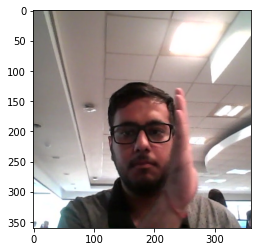

In [6]:
#Reading image 1
image1 = imread("datasets/Project_data/train/WIN_20180907_15_41_54_Pro_Right Swipe_new/WIN_20180907_15_41_54_Pro_00015.png")
plt.imshow(image1)

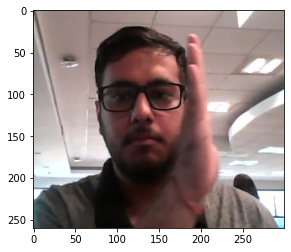

In [7]:
#Verifying cropping output on sample images
image1 = image1[100:,50:350]
plt.imshow(image1)

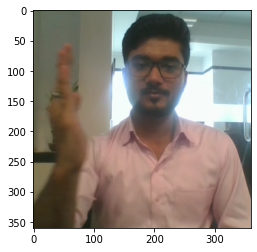

In [8]:
#Reading image 2
image2 = imread("datasets/Project_data/val/WIN_20180907_15_45_04_Pro_Left Swipe_new_Left Swipe_new/WIN_20180907_15_45_04_Pro_00042.png")
plt.imshow(image2)

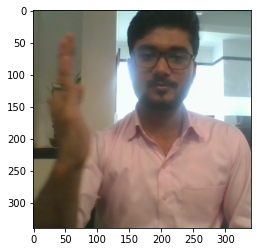

In [9]:
#Verifying cropping output on sample images
image2 = image2[20:,:-20]
plt.imshow(image2)

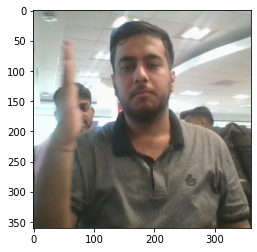

In [10]:
#Reading image 3
image3 = imread("datasets/Project_data/train/WIN_20180907_15_46_43_Pro_Left Swipe_new_Left Swipe_new/WIN_20180907_15_46_43_Pro_00046.png")
plt.imshow(image3)

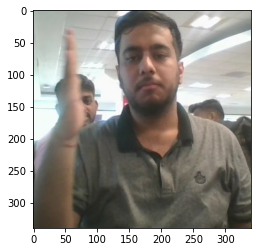

In [11]:
#Verifying cropping output on sample images
image3 = image3[20:,:-20]
plt.imshow(image3)

*Hence selecting [20:,:-20] matrix for cropping as it will be suitable for most of the images and will not let loose ay useful infromation*

## Useful Functions
Defining some useful functions which will be used throughout

In [12]:
import matplotlib.pyplot as plt
def plot(history):
    fig, axes = plt.subplots(1,2, figsize=(15,4))

    axes[0].plot(history.history['categorical_accuracy'],label='Training Accuracy')   
    axes[0].plot(history.history['val_categorical_accuracy'],label='Validation Accuracy')
    axes[0].legend(loc='lower right')
    axes[0].title.set_text('Training and Validation Accuracy')

    axes[1].plot(history.history['loss'],label='Training Loss')   
    axes[1].plot(history.history['val_loss'],label='Validation Loss')
    axes[1].legend(loc='upper right')
    axes[1].title.set_text('Training and Validation Loss')


In [13]:
np.random.seed(30)
rn.seed(30)
tf.random.set_seed(30)

## Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [14]:
class ModelGenerator:

    # Function for defining image size
    def image_size(self,image_height=100,image_width=100):
        self.image_height=image_height
        self.image_width=image_width

    # Function to define few other parameters
    def other_parameters(self,num_images=15,epochs=15,batch_size=51):
        self.num_images=num_images
        self.epochs= epochs
        self.batch_size= batch_size

    # Generator Function
    def generator(self,source_path,folder_list):
        print( 'Source path = ', source_path, '; batch size =', self.batch_size)
        img_idx = (np.linspace(0,29,self.num_images)).astype(int)
        #create a list of image numbers you want to use for a particular video
        while True:
            t = np.random.permutation(folder_list)
            num_batches = len(folder_list)//self.batch_size # calculate the number of batches
            for batch in range(num_batches): # we iterate over the number of batches
                x=len(img_idx)
                y=self.image_width
                z=self.image_height
                batch_data = np.zeros((self.batch_size,x,y,z,3)) 
                #x is the number of images you use for each video,
                # (y,z) is the final size of the input images and 3 is the number of channels RGB
                batch_labels = np.zeros((self.batch_size,5)) # batch_labels is the one hot representation of the output
                for folder in range(self.batch_size): # iterate over the batch_size
                    imgs = os.listdir(source_path+'/'+ t[folder + (batch*self.batch_size)].split(';')[0]) 
            
                    # read all the images in the folder
                    for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                        image = imread(source_path+'/'+ t[folder + (batch*self.batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
        
                        #crop the images and resize them. Note that the images are of 2 different shape 
                        #and the conv3D will throw error if the inputs in a batch have different shapes
                        
                        #cropping the image
                        #selecting [20:,:-20] matrix as it seemed to be most suitable for maximum images
                    
                        #resizing the image
                        image = image[20:,:-20]
                        image = resize(image,(y,z,3))
                        
                        #batch_data[folder,idx,:,:,0] = image[:,:,0]-(image.mean()) #normalise and feed in the image
                        batch_data[folder,idx,:,:,0] = image[:,:,0]/255 #normalise and feed in the image
                        batch_data[folder,idx,:,:,1] = image[:,:,1]/255 #normalise and feed in the image
                        batch_data[folder,idx,:,:,2] = image[:,:,2]/255 #normalise and feed in the image
                        
                    batch_labels[folder, int(t[folder + (batch*self.batch_size)].strip().split(';')[2])] = 1
                yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

            
            # write the code for the remaining data points which are left after full batches
            leftover_data = len(folder_list)%self.batch_size
            if (leftover_data != 0) :
                batch_size = leftover_data
                num_batches = 1
                for batch in range(num_batches): # we iterate over the number of batches
                    x=len(img_idx)
                    y=self.image_width
                    z=self.image_height
                    batch_data = np.zeros((batch_size,x,y,z,3)) 
                    #x is the number of images you use for each video,
                    # (y,z) is the final size of the input images and 3 is the number of channels RGB
                    batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
                    for folder in range(batch_size): # iterate over the batch_size
                        imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) 
                    
                        # read all the images in the folder
                        for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                            image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                            
                            #crop the images and resize them. Note that the images are of 2 different shape 
                            #and the conv3D will throw error if the inputs in a batch have different shapes

                            #cropping the image
                            #selecting [20:,:-20] matrix as it seemed to be most suitable for maximum images
                            #resizing the image
                            
                            image = image[20:,:-20]
                            image = resize(image,(y,z,3))
                            
                            batch_data[folder,idx,:,:,0] = image[:,:,0]/255 #normalise and feed in the image
                            batch_data[folder,idx,:,:,1] = image[:,:,1]/255 #normalise and feed in the image
                            batch_data[folder,idx,:,:,2] = image[:,:,2]/255 #normalise and feed in the image

                        batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
                    yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

    #Function to define parameters for model training           
    def train_model(self,train_path,val_path,train_doc,val_doc,model):

        curr_dt_time = datetime.datetime.now()

        num_train_sequences = len(train_doc)
        print('# training sequences =', num_train_sequences)
        num_val_sequences = len(val_doc)
        print('# validation sequences =', num_val_sequences)
        num_epochs = self.epochs # choose the number of epochs
        print ('# epochs =', num_epochs)

        model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
        if not os.path.exists(model_name):
            os.mkdir(model_name)
                
        filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'
        
        checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

        LR = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1,min_lr=0.000001) # write the REducelronplateau code here
        #using high factor value here as the validation accuracy is very low compared to train accuracy
        
        callbacks_list = [checkpoint, LR]
        
        #steps per epoch for train data
        if (num_train_sequences%self.batch_size) == 0:
            steps_per_epoch = int(num_train_sequences/self.batch_size)
        else:
            steps_per_epoch = (num_train_sequences//self.batch_size) + 1

        #steps per epoch for val data
        if (num_val_sequences%self.batch_size) == 0:
            validation_steps = int(num_val_sequences/self.batch_size)
        else:
            validation_steps = (num_val_sequences//self.batch_size) + 1

        train_generator = self.generator(train_path,train_doc)
        val_generator = self.generator(val_path,val_doc)

        # Model Fit 
        history = model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)
       
        return history
        

Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

## Model
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

In [15]:
# Importing Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation,LSTM,Dropout,SimpleRNN
from tensorflow.keras.layers import Conv3D, MaxPooling3D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD

## Building 2D RNN Network

In [50]:
class Model2DRNN_1(ModelGenerator):

    def define_model(self,filter=(3,3),dense_neurons=64,dropout=0.25):

        input_shape_model = (self.num_images,self.image_width,self.image_height,3)
        
        model = Sequential()
        model.add(TimeDistributed(Conv2D(16, filter , padding='same', activation='relu'),input_shape=input_shape_model))
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D((2, 2))))
                
        model.add(TimeDistributed(Conv2D(32, filter , padding='same', activation='relu')))
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D((2, 2))))
                
        model.add(TimeDistributed(Conv2D(64, filter , padding='same', activation='relu')))
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D((2, 2))))
                
        model.add(TimeDistributed(Conv2D(128, filter , padding='same', activation='relu')))
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D((2, 2))))
                
        model.add(TimeDistributed(Conv2D(256, filter , padding='same', activation='relu')))
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D((2, 2))))

        model.add(TimeDistributed(Flatten()))


        model.add(LSTM(dense_neurons))
        model.add(Dropout(dropout))
                
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(Dropout(dropout))
                
        model.add(Dense(5, activation='softmax'))

        optimiser = 'adam'
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        K.set_value(model.optimizer.learning_rate,0.0002)
        print("The learning rate is: {}".format(K.eval(model.optimizer.lr)))
        return model

Now that you have written the model, the next step is to `compile` the model. When you print the `summary` of the model, you'll see the total number of parameters you have to train.

In [51]:
conv_2drnn_1=Model2DRNN_1()
conv_2drnn_1.image_size(image_height=160,image_width=160)
conv_2drnn_1.other_parameters(num_images=15,epochs=5,batch_size=51)
conv_2drnn_1_model=conv_2drnn_1.define_model(filter=(3,3),dense_neurons=64,dropout=0.25)
conv_2drnn_1_model.summary()

The learning rate is: 0.00019999999494757503
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 15, 160, 160, 16)  448       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 15, 160, 160, 16)  64        
_________________________________________________________________
time_distributed_2 (TimeDist (None, 15, 80, 80, 16)    0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 15, 80, 80, 32)    4640      
_________________________________________________________________
time_distributed_4 (TimeDist (None, 15, 80, 80, 32)    128       
_________________________________________________________________
time_distributed_5 (TimeDist (None, 15, 40, 40, 32)    0         
_________________________________________________________________
time_distri

In [52]:
print("Total Params:", conv_2drnn_1_model.count_params())
history_conv_2drnn_1 = conv_2drnn_1.train_model(train_path,val_path,train_doc,val_doc,conv_2drnn_1_model)

Total Params: 2054117
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 51
Epoch 1/5
13/13 [==============================] - ETA: 0s - loss: 1.5028 - categorical_accuracy: 0.3544Source path =  datasets/Project_data/val ; batch size = 51

Epoch 00001: saving model to model_init_2021-05-2410_45_15.876400/model-00001-1.50280-0.35445-1.62446-0.16667.h5
13/13 [==============================] - 79s 6s/step - loss: 1.5028 - categorical_accuracy: 0.3544 - val_loss: 1.6245 - val_categorical_accuracy: 0.1667
Epoch 2/5
13/13 [==============================] - ETA: 0s - loss: 1.1596 - categorical_accuracy: 0.5928
Epoch 00002: saving model to model_init_2021-05-2410_45_15.876400/model-00002-1.15965-0.59276-1.62500-0.17647.h5
13/13 [==============================] - 82s 6s/step - loss: 1.1596 - categorical_accuracy: 0.5928 - val_loss: 1.6250 - val_categorical_accuracy: 0.1765
Epoch 3/5
13/13 [==============================

Let us create the `train_generator` and the `val_generator` which will be used in `.fit_generator`.

The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls it need to make.

Let us now fit the model. This will start training the model and with the help of the checkpoints, you'll be able to save the model at the end of each epoch.

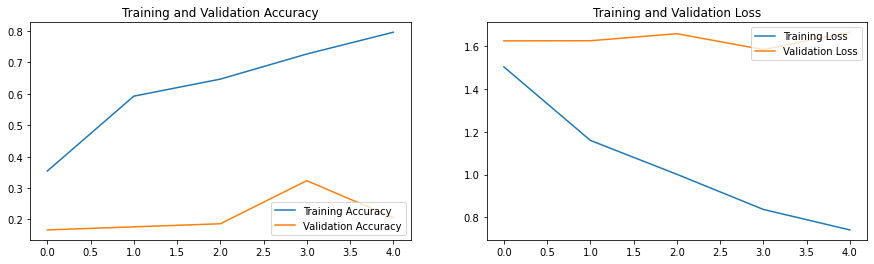

In [53]:
plot(history_conv_2drnn_1)

In [54]:
conv_2drnn_2=Model2DRNN_1()
conv_2drnn_2.image_size(image_height=100,image_width=100)
conv_2drnn_2.other_parameters(num_images=15,epochs=5,batch_size=51)
conv_2drnn_2_model=conv_2drnn_2.define_model(filter=(3,3),dense_neurons=64,dropout=0.25)
conv_2drnn_2_model.summary()

The learning rate is: 0.00019999999494757503
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_16 (TimeDis (None, 15, 100, 100, 16)  448       
_________________________________________________________________
time_distributed_17 (TimeDis (None, 15, 100, 100, 16)  64        
_________________________________________________________________
time_distributed_18 (TimeDis (None, 15, 50, 50, 16)    0         
_________________________________________________________________
time_distributed_19 (TimeDis (None, 15, 50, 50, 32)    4640      
_________________________________________________________________
time_distributed_20 (TimeDis (None, 15, 50, 50, 32)    128       
_________________________________________________________________
time_distributed_21 (TimeDis (None, 15, 25, 25, 32)    0         
_________________________________________________________________
time_dist

In [55]:
print("Total Params:", conv_2drnn_2_model.count_params())
history_conv_2drnn_2 = conv_2drnn_2.train_model(train_path,val_path,train_doc,val_doc,conv_2drnn_2_model)

Total Params: 1005541
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 51
Epoch 1/5
13/13 [==============================] - ETA: 0s - loss: 1.5293 - categorical_accuracy: 0.3213Source path =  datasets/Project_data/val ; batch size = 51

Epoch 00001: saving model to model_init_2021-05-2410_52_20.698510/model-00001-1.52928-0.32127-1.61794-0.16667.h5
13/13 [==============================] - 70s 5s/step - loss: 1.5293 - categorical_accuracy: 0.3213 - val_loss: 1.6179 - val_categorical_accuracy: 0.1667
Epoch 2/5
13/13 [==============================] - ETA: 0s - loss: 1.2244 - categorical_accuracy: 0.5143
Epoch 00002: saving model to model_init_2021-05-2410_52_20.698510/model-00002-1.22438-0.51433-1.73908-0.15686.h5
13/13 [==============================] - 71s 5s/step - loss: 1.2244 - categorical_accuracy: 0.5143 - val_loss: 1.7391 - val_categorical_accuracy: 0.1569
Epoch 3/5
13/13 [==============================

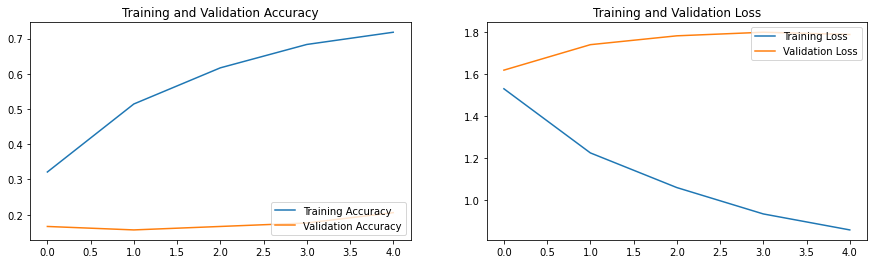

In [56]:
plot(history_conv_2drnn_2)

In [57]:
conv_2drnn_3=Model2DRNN_1()
conv_2drnn_3.image_size(image_height=120,image_width=120)
conv_2drnn_3.other_parameters(num_images=15,epochs=5,batch_size=51)
conv_2drnn_3_model=conv_2drnn_3.define_model(filter=(3,3),dense_neurons=64,dropout=0.25)
conv_2drnn_3_model.summary()

The learning rate is: 0.00019999999494757503
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_32 (TimeDis (None, 15, 120, 120, 16)  448       
_________________________________________________________________
time_distributed_33 (TimeDis (None, 15, 120, 120, 16)  64        
_________________________________________________________________
time_distributed_34 (TimeDis (None, 15, 60, 60, 16)    0         
_________________________________________________________________
time_distributed_35 (TimeDis (None, 15, 60, 60, 32)    4640      
_________________________________________________________________
time_distributed_36 (TimeDis (None, 15, 60, 60, 32)    128       
_________________________________________________________________
time_distributed_37 (TimeDis (None, 15, 30, 30, 32)    0         
_________________________________________________________________
time_dist

In [58]:
print("Total Params:", conv_2drnn_3_model.count_params())
history_conv_2drnn_3 = conv_2drnn_3.train_model(train_path,val_path,train_doc,val_doc,conv_2drnn_3_model)

Total Params: 1005541
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 51
Epoch 1/5
13/13 [==============================] - ETA: 0s - loss: 1.5622 - categorical_accuracy: 0.3243Source path =  datasets/Project_data/val ; batch size = 51

Epoch 00001: saving model to model_init_2021-05-2410_58_28.542466/model-00001-1.56218-0.32428-1.61170-0.20588.h5
13/13 [==============================] - 73s 6s/step - loss: 1.5622 - categorical_accuracy: 0.3243 - val_loss: 1.6117 - val_categorical_accuracy: 0.2059
Epoch 2/5
13/13 [==============================] - ETA: 0s - loss: 1.2986 - categorical_accuracy: 0.4781
Epoch 00002: saving model to model_init_2021-05-2410_58_28.542466/model-00002-1.29864-0.47813-1.59296-0.25490.h5
13/13 [==============================] - 73s 6s/step - loss: 1.2986 - categorical_accuracy: 0.4781 - val_loss: 1.5930 - val_categorical_accuracy: 0.2549
Epoch 3/5
13/13 [==============================

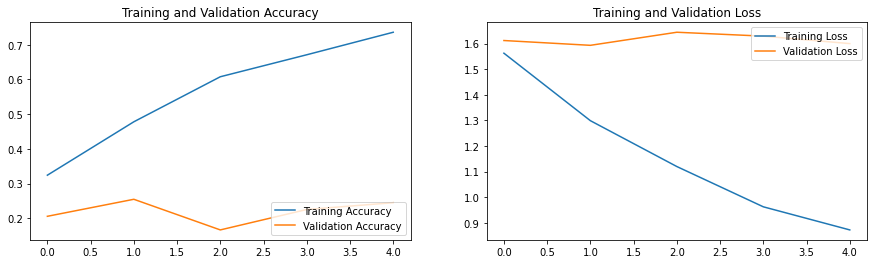

In [59]:
plot(history_conv_2drnn_3)

In [60]:
conv_2drnn_4=Model2DRNN_1()
conv_2drnn_4.image_size(image_height=120,image_width=120)
conv_2drnn_4.other_parameters(num_images=15,epochs=5,batch_size=39)
conv_2drnn_4_model=conv_2drnn_4.define_model(filter=(3,3),dense_neurons=64,dropout=0.25)
conv_2drnn_4_model.summary()

The learning rate is: 0.00019999999494757503
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_48 (TimeDis (None, 15, 120, 120, 16)  448       
_________________________________________________________________
time_distributed_49 (TimeDis (None, 15, 120, 120, 16)  64        
_________________________________________________________________
time_distributed_50 (TimeDis (None, 15, 60, 60, 16)    0         
_________________________________________________________________
time_distributed_51 (TimeDis (None, 15, 60, 60, 32)    4640      
_________________________________________________________________
time_distributed_52 (TimeDis (None, 15, 60, 60, 32)    128       
_________________________________________________________________
time_distributed_53 (TimeDis (None, 15, 30, 30, 32)    0         
_________________________________________________________________
time_dist

In [61]:
print("Total Params:", conv_2drnn_4_model.count_params())
history_conv_2drnn_4 = conv_2drnn_4.train_model(train_path,val_path,train_doc,val_doc,conv_2drnn_4_model)

Total Params: 1005541
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 39
Epoch 1/5
17/17 [==============================] - ETA: 0s - loss: 1.5391 - categorical_accuracy: 0.3167Source path =  datasets/Project_data/val ; batch size = 39

Epoch 00001: saving model to model_init_2021-05-2411_04_50.071385/model-00001-1.53908-0.31674-1.58267-0.31624.h5
17/17 [==============================] - 74s 4s/step - loss: 1.5391 - categorical_accuracy: 0.3167 - val_loss: 1.5827 - val_categorical_accuracy: 0.3162
Epoch 2/5
17/17 [==============================] - ETA: 0s - loss: 1.2616 - categorical_accuracy: 0.4992
Epoch 00002: saving model to model_init_2021-05-2411_04_50.071385/model-00002-1.26156-0.49925-1.59218-0.24786.h5
17/17 [==============================] - 75s 4s/step - loss: 1.2616 - categorical_accuracy: 0.4992 - val_loss: 1.5922 - val_categorical_accuracy: 0.2479
Epoch 3/5
17/17 [==============================

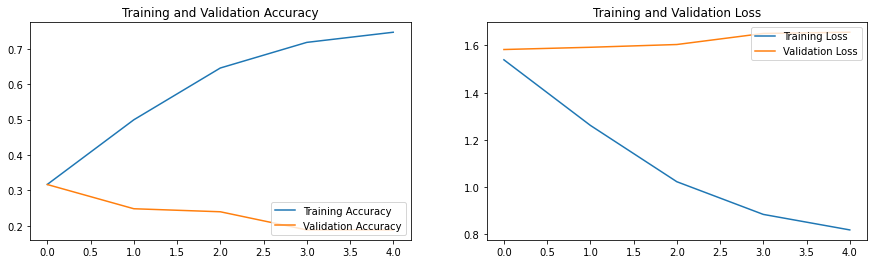

In [62]:
plot(history_conv_2drnn_4)

In [63]:
conv_2drnn_5=Model2DRNN_1()
conv_2drnn_5.image_size(image_height=120,image_width=120)
conv_2drnn_5.other_parameters(num_images=20,epochs=5,batch_size=39)
conv_2drnn_5_model=conv_2drnn_5.define_model(filter=(3,3),dense_neurons=64,dropout=0.25)
conv_2drnn_5_model.summary()

The learning rate is: 0.00019999999494757503
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_64 (TimeDis (None, 20, 120, 120, 16)  448       
_________________________________________________________________
time_distributed_65 (TimeDis (None, 20, 120, 120, 16)  64        
_________________________________________________________________
time_distributed_66 (TimeDis (None, 20, 60, 60, 16)    0         
_________________________________________________________________
time_distributed_67 (TimeDis (None, 20, 60, 60, 32)    4640      
_________________________________________________________________
time_distributed_68 (TimeDis (None, 20, 60, 60, 32)    128       
_________________________________________________________________
time_distributed_69 (TimeDis (None, 20, 30, 30, 32)    0         
_________________________________________________________________
time_dist

In [64]:
print("Total Params:", conv_2drnn_5_model.count_params())
history_conv_2drnn_5 = conv_2drnn_5.train_model(train_path,val_path,train_doc,val_doc,conv_2drnn_5_model)

Total Params: 1005541
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 39
Epoch 1/5
17/17 [==============================] - ETA: 0s - loss: 1.5781 - categorical_accuracy: 0.3017Source path =  datasets/Project_data/val ; batch size = 39

Epoch 00001: saving model to model_init_2021-05-2411_11_15.881265/model-00001-1.57814-0.30166-1.64209-0.12821.h5
17/17 [==============================] - 99s 6s/step - loss: 1.5781 - categorical_accuracy: 0.3017 - val_loss: 1.6421 - val_categorical_accuracy: 0.1282
Epoch 2/5
17/17 [==============================] - ETA: 0s - loss: 1.2633 - categorical_accuracy: 0.4902
Epoch 00002: saving model to model_init_2021-05-2411_11_15.881265/model-00002-1.26334-0.49020-1.67532-0.18803.h5
17/17 [==============================] - 101s 6s/step - loss: 1.2633 - categorical_accuracy: 0.4902 - val_loss: 1.6753 - val_categorical_accuracy: 0.1880
Epoch 3/5
17/17 [=============================

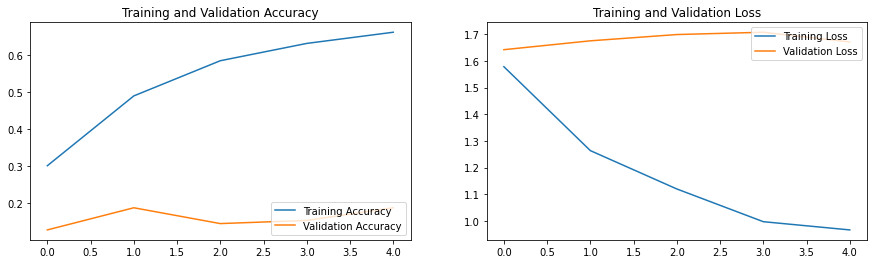

In [65]:
plot(history_conv_2drnn_5)

## Trying GRU. Previous models didn't give more than 20% accuracy on validation set.
## Trying different network architecture.

In [66]:
#Trying GRU
class Model2DRNN_2(ModelGenerator):

    def define_model(self,filter=(3,3),dense_neurons=64,dropout=0.25):

        input_shape_model = (self.num_images,self.image_width,self.image_height,3)
        
        model = Sequential()
        model.add(TimeDistributed(Conv2D(16, filter , padding='same', activation='relu'),input_shape=input_shape_model))
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D((2, 2))))
                
        model.add(TimeDistributed(Conv2D(32, filter , padding='same', activation='relu')))
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D((2, 2))))
                
        model.add(TimeDistributed(Conv2D(64, filter , padding='same', activation='relu')))
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D((2, 2))))
                
        model.add(TimeDistributed(Conv2D(128, filter , padding='same', activation='relu')))
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D((2, 2))))
                
        model.add(TimeDistributed(Conv2D(256, filter , padding='same', activation='relu')))
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D((2, 2))))

        model.add(TimeDistributed(Flatten()))

        model.add(GRU(dense_neurons))
        model.add(Dropout(dropout))
                
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(Dropout(dropout))
                
        model.add(Dense(5, activation='softmax'))

        optimiser = 'adam'
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        K.set_value(model.optimizer.learning_rate,0.0002)

        return model

In [67]:
conv_2drnn2_1=Model2DRNN_2()
conv_2drnn2_1.image_size(image_height=120,image_width=120)
conv_2drnn2_1.other_parameters(num_images=20,epochs=5,batch_size=39)
conv_2drnn2_1_model=conv_2drnn2_1.define_model(filter=(3,3),dense_neurons=64,dropout=0.25)
conv_2drnn2_1_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_80 (TimeDis (None, 20, 120, 120, 16)  448       
_________________________________________________________________
time_distributed_81 (TimeDis (None, 20, 120, 120, 16)  64        
_________________________________________________________________
time_distributed_82 (TimeDis (None, 20, 60, 60, 16)    0         
_________________________________________________________________
time_distributed_83 (TimeDis (None, 20, 60, 60, 32)    4640      
_________________________________________________________________
time_distributed_84 (TimeDis (None, 20, 60, 60, 32)    128       
_________________________________________________________________
time_distributed_85 (TimeDis (None, 20, 30, 30, 32)    0         
_________________________________________________________________
time_distributed_86 (TimeDis (None, 20, 30, 30, 64)   

In [68]:
print("Total Params:", conv_2drnn2_1_model.count_params())
history_conv_2drnn2_1 = conv_2drnn2_1.train_model(train_path,val_path,train_doc,val_doc,conv_2drnn2_1_model)

Total Params: 854117
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 39
Epoch 1/5
17/17 [==============================] - ETA: 0s - loss: 1.4293 - categorical_accuracy: 0.3831Source path =  datasets/Project_data/val ; batch size = 39

Epoch 00001: saving model to model_init_2021-05-2411_19_48.671396/model-00001-1.42926-0.38311-1.61963-0.18803.h5
17/17 [==============================] - 101s 6s/step - loss: 1.4293 - categorical_accuracy: 0.3831 - val_loss: 1.6196 - val_categorical_accuracy: 0.1880
Epoch 2/5
17/17 [==============================] - ETA: 0s - loss: 0.9677 - categorical_accuracy: 0.6290
Epoch 00002: saving model to model_init_2021-05-2411_19_48.671396/model-00002-0.96775-0.62896-1.78103-0.14530.h5
17/17 [==============================] - 100s 6s/step - loss: 0.9677 - categorical_accuracy: 0.6290 - val_loss: 1.7810 - val_categorical_accuracy: 0.1453
Epoch 3/5
17/17 [=============================

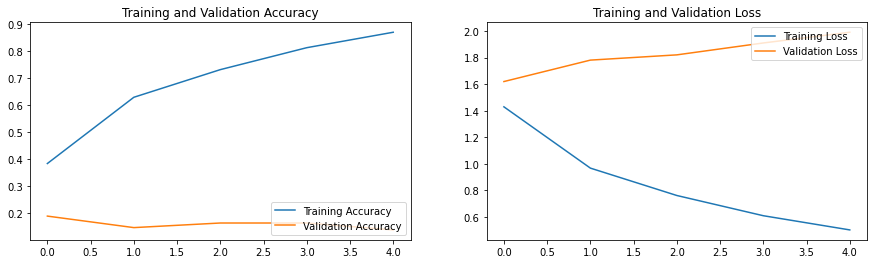

In [69]:
plot(history_conv_2drnn2_1)

In [70]:
#Trying Simple RNN
class Model2DRNN_3(ModelGenerator):

    def define_model(self,filter=(3,3),dense_neurons=64,dropout=0.25):

        input_shape_model = (self.num_images,self.image_width,self.image_height,3)
        
        model = Sequential()
        model.add(TimeDistributed(Conv2D(16, filter , padding='same', activation='relu'),input_shape=input_shape_model))
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D((2, 2))))
                
        model.add(TimeDistributed(Conv2D(32, filter , padding='same', activation='relu')))
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D((2, 2))))
                
        model.add(TimeDistributed(Conv2D(64, filter , padding='same', activation='relu')))
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D((2, 2))))
                
        model.add(TimeDistributed(Conv2D(128, filter , padding='same', activation='relu')))
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D((2, 2))))
                
        model.add(TimeDistributed(Conv2D(256, filter , padding='same', activation='relu')))
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D((2, 2))))

        model.add(TimeDistributed(Flatten()))

        model.add(SimpleRNN(dense_neurons))
        model.add(Dropout(dropout))
                
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(Dropout(dropout))
                
        model.add(Dense(5, activation='softmax'))

        optimiser = 'adam'
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        K.set_value(model.optimizer.learning_rate,0.0002)

        return model

In [71]:
conv_2drnn3_1=Model2DRNN_3()
conv_2drnn3_1.image_size(image_height=120,image_width=120)
conv_2drnn3_1.other_parameters(num_images=20,epochs=5,batch_size=39)
conv_2drnn3_1_model=conv_2drnn3_1.define_model(filter=(3,3),dense_neurons=64,dropout=0.25)
conv_2drnn3_1_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_96 (TimeDis (None, 20, 120, 120, 16)  448       
_________________________________________________________________
time_distributed_97 (TimeDis (None, 20, 120, 120, 16)  64        
_________________________________________________________________
time_distributed_98 (TimeDis (None, 20, 60, 60, 16)    0         
_________________________________________________________________
time_distributed_99 (TimeDis (None, 20, 60, 60, 32)    4640      
_________________________________________________________________
time_distributed_100 (TimeDi (None, 20, 60, 60, 32)    128       
_________________________________________________________________
time_distributed_101 (TimeDi (None, 20, 30, 30, 32)    0         
_________________________________________________________________
time_distributed_102 (TimeDi (None, 20, 30, 30, 64)   

In [72]:
print("Total Params:", conv_2drnn3_1_model.count_params())
history_conv_2drnn3_1 = conv_2drnn3_1.train_model(train_path,val_path,train_doc,val_doc,conv_2drnn3_1_model)

Total Params: 550693
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 39
Epoch 1/5
17/17 [==============================] - ETA: 0s - loss: 1.6024 - categorical_accuracy: 0.3062Source path =  datasets/Project_data/val ; batch size = 39

Epoch 00001: saving model to model_init_2021-05-2411_28_18.843466/model-00001-1.60245-0.30618-1.64243-0.12821.h5
17/17 [==============================] - 102s 6s/step - loss: 1.6024 - categorical_accuracy: 0.3062 - val_loss: 1.6424 - val_categorical_accuracy: 0.1282
Epoch 2/5
17/17 [==============================] - ETA: 0s - loss: 1.1380 - categorical_accuracy: 0.5762
Epoch 00002: saving model to model_init_2021-05-2411_28_18.843466/model-00002-1.13800-0.57617-1.76008-0.15385.h5
17/17 [==============================] - 100s 6s/step - loss: 1.1380 - categorical_accuracy: 0.5762 - val_loss: 1.7601 - val_categorical_accuracy: 0.1538
Epoch 3/5
17/17 [=============================

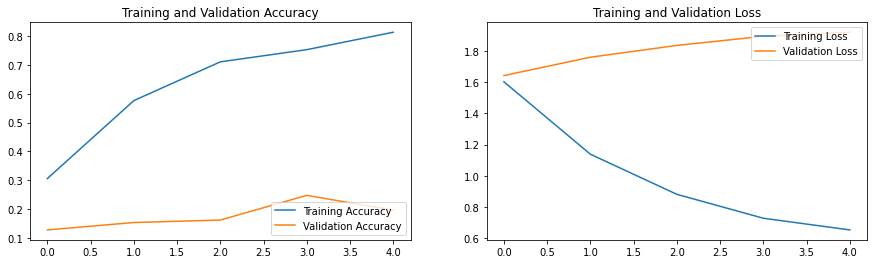

In [73]:
plot(history_conv_2drnn3_1)

## GRU approach is not giving satisfactory result too. Trying another approach with different hyperparameters and layers.

## Building 3D RNN Network

In [20]:
class Model3DConv_1(ModelGenerator):

    def define_model(self,filter=(3,3,3),dense_neurons=64,dropout=0.25):

        input_shape_model = (self.num_images,self.image_width,self.image_height,3)
        
        model = Sequential()
        model.add(Conv3D(16, filter, padding='same',input_shape=input_shape_model))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(32, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(64, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(5,activation='softmax'))

        optimiser = 'adam'
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        K.set_value(model.optimizer.learning_rate,0.0002)

        return model

In [21]:
conv_3dconv1_1=Model3DConv_1()
conv_3dconv1_1.image_size(image_height=120,image_width=120)
conv_3dconv1_1.other_parameters(num_images=15,epochs=5,batch_size=39)
conv_3dconv1_1_model=conv_3dconv1_1.define_model(filter=(3,3,3),dense_neurons=64,dropout=0.25)
conv_3dconv1_1_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_3 (Conv3D)            (None, 15, 120, 120, 16)  1312      
_________________________________________________________________
activation_3 (Activation)    (None, 15, 120, 120, 16)  0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 15, 120, 120, 16)  64        
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 7, 60, 60, 16)     0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 7, 60, 60, 32)     13856     
_________________________________________________________________
activation_4 (Activation)    (None, 7, 60, 60, 32)     0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 7, 60, 60, 32)    

In [76]:
print("Total Params:", conv_3dconv1_1_model.count_params())
history_conv_3dconv1_1 = conv_3dconv1_1.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv1_1_model)

Total Params: 997637
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 39
Epoch 1/5
17/17 [==============================] - ETA: 0s - loss: 1.6258 - categorical_accuracy: 0.3997Source path =  datasets/Project_data/val ; batch size = 39

Epoch 00001: saving model to model_init_2021-05-2411_36_51.825213/model-00001-1.62581-0.39970-1.62026-0.19658.h5
17/17 [==============================] - 75s 4s/step - loss: 1.6258 - categorical_accuracy: 0.3997 - val_loss: 1.6203 - val_categorical_accuracy: 0.1966
Epoch 2/5
17/17 [==============================] - ETA: 0s - loss: 0.9700 - categorical_accuracy: 0.6169
Epoch 00002: saving model to model_init_2021-05-2411_36_51.825213/model-00002-0.97001-0.61689-2.01734-0.15385.h5
17/17 [==============================] - 76s 4s/step - loss: 0.9700 - categorical_accuracy: 0.6169 - val_loss: 2.0173 - val_categorical_accuracy: 0.1538
Epoch 3/5
17/17 [==============================]

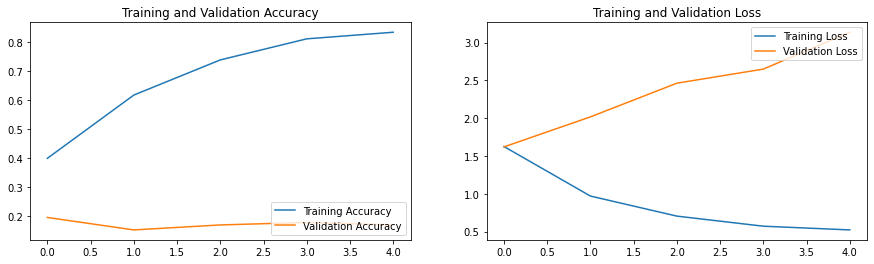

In [77]:
plot(history_conv_3dconv1_1)

In [19]:
#updating dense neurons 
class Model3DConv_2(ModelGenerator):

    def define_model(self,filter=(3,3,3),dense_neurons=128,dropout=0.25):

        input_shape_model = (self.num_images,self.image_width,self.image_height,3)
        
        model = Sequential()
        model.add(Conv3D(16, filter, padding='same',input_shape=input_shape_model))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(32, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(64, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(5,activation='softmax'))

        optimiser = 'adam'
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        K.set_value(model.optimizer.learning_rate,0.0002)

        return model

In [22]:
conv_3dconv2_1=Model3DConv_2()
conv_3dconv2_1.image_size(image_height=120,image_width=120)
conv_3dconv2_1.other_parameters(num_images=15,epochs=5,batch_size=39)
conv_3dconv2_1_model=conv_3dconv2_1.define_model(filter=(3,3,3),dense_neurons=128,dropout=0.25)
conv_3dconv2_1_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_6 (Conv3D)            (None, 15, 120, 120, 16)  1312      
_________________________________________________________________
activation_6 (Activation)    (None, 15, 120, 120, 16)  0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 15, 120, 120, 16)  64        
_________________________________________________________________
max_pooling3d_6 (MaxPooling3 (None, 7, 60, 60, 16)     0         
_________________________________________________________________
conv3d_7 (Conv3D)            (None, 7, 60, 60, 32)     13856     
_________________________________________________________________
activation_7 (Activation)    (None, 7, 60, 60, 32)     0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 7, 60, 60, 32)    

In [80]:
print("Total Params:", conv_3dconv2_1_model.count_params())
history_conv_3dconv2_1 = conv_3dconv2_1.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv2_1_model)

Total Params: 1932485
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 39
Epoch 1/5
17/17 [==============================] - ETA: 0s - loss: 1.8369 - categorical_accuracy: 0.3756Source path =  datasets/Project_data/val ; batch size = 39

Epoch 00001: saving model to model_init_2021-05-2411_43_15.937496/model-00001-1.83688-0.37557-1.65723-0.16239.h5
17/17 [==============================] - 76s 4s/step - loss: 1.8369 - categorical_accuracy: 0.3756 - val_loss: 1.6572 - val_categorical_accuracy: 0.1624
Epoch 2/5
17/17 [==============================] - ETA: 0s - loss: 0.8924 - categorical_accuracy: 0.6606
Epoch 00002: saving model to model_init_2021-05-2411_43_15.937496/model-00002-0.89244-0.66063-1.85652-0.21368.h5
17/17 [==============================] - 75s 4s/step - loss: 0.8924 - categorical_accuracy: 0.6606 - val_loss: 1.8565 - val_categorical_accuracy: 0.2137
Epoch 3/5
17/17 [==============================

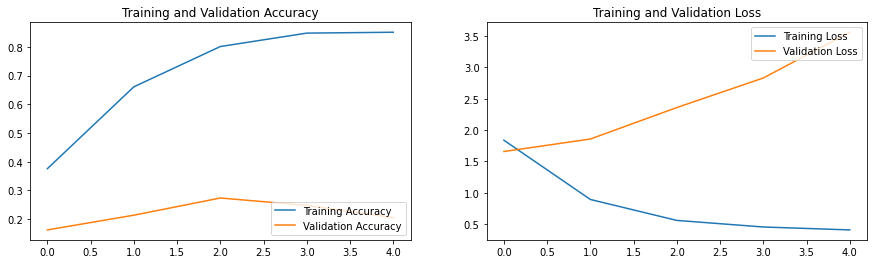

In [81]:
plot(history_conv_3dconv2_1)

In [23]:
#increasing the number of images
conv_3dconv2_2=Model3DConv_2()
conv_3dconv2_2.image_size(image_height=120,image_width=120)
conv_3dconv2_2.other_parameters(num_images=18,epochs=5,batch_size=39)
conv_3dconv2_2_model=conv_3dconv2_2.define_model(filter=(3,3,3),dense_neurons=128,dropout=0.25)
conv_3dconv2_2_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_9 (Conv3D)            (None, 18, 120, 120, 16)  1312      
_________________________________________________________________
activation_9 (Activation)    (None, 18, 120, 120, 16)  0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 18, 120, 120, 16)  64        
_________________________________________________________________
max_pooling3d_9 (MaxPooling3 (None, 9, 60, 60, 16)     0         
_________________________________________________________________
conv3d_10 (Conv3D)           (None, 9, 60, 60, 32)     13856     
_________________________________________________________________
activation_10 (Activation)   (None, 9, 60, 60, 32)     0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 9, 60, 60, 32)    

In [83]:
print("Total Params:", conv_3dconv2_2_model.count_params())
history_conv_3dconv2_2 = conv_3dconv2_2.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv2_2_model)

Total Params: 3775685
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 39
Epoch 1/5
17/17 [==============================] - ETA: 0s - loss: 1.5458 - categorical_accuracy: 0.4646Source path =  datasets/Project_data/val ; batch size = 39

Epoch 00001: saving model to model_init_2021-05-2411_49_40.600539/model-00001-1.54582-0.46456-1.66391-0.19658.h5
17/17 [==============================] - 88s 5s/step - loss: 1.5458 - categorical_accuracy: 0.4646 - val_loss: 1.6639 - val_categorical_accuracy: 0.1966
Epoch 2/5
17/17 [==============================] - ETA: 0s - loss: 0.6690 - categorical_accuracy: 0.7526
Epoch 00002: saving model to model_init_2021-05-2411_49_40.600539/model-00002-0.66898-0.75264-2.26591-0.15385.h5
17/17 [==============================] - 88s 5s/step - loss: 0.6690 - categorical_accuracy: 0.7526 - val_loss: 2.2659 - val_categorical_accuracy: 0.1538
Epoch 3/5
17/17 [==============================

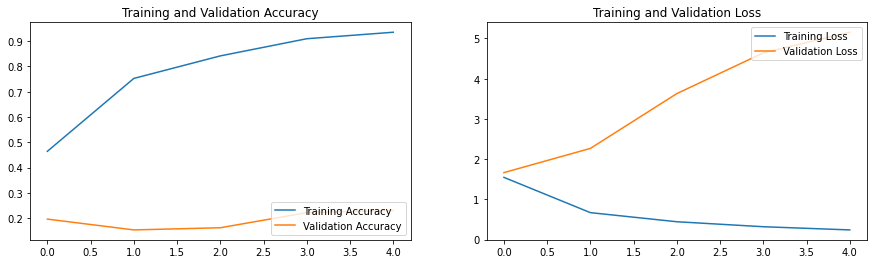

In [84]:
plot(history_conv_3dconv2_2)

In [85]:
#updating dense neurons to 256
class Model3DConv_3(ModelGenerator):

    def define_model(self,filter=(3,3,3),dense_neurons=64,dropout=0.25):

        input_shape_model = (self.num_images,self.image_width,self.image_height,3)
        
        model = Sequential()
        model.add(Conv3D(16, filter, padding='same',input_shape=input_shape_model))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(32, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(64, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(5,activation='softmax'))

        optimiser = 'adam'
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        K.set_value(model.optimizer.learning_rate,0.0002)

        return model

In [86]:
conv_3dconv3_1=Model3DConv_3()
conv_3dconv3_1.image_size(image_height=120,image_width=120)
conv_3dconv3_1.other_parameters(num_images=15,epochs=5,batch_size=39)
conv_3dconv3_1_model=conv_3dconv3_1.define_model(filter=(3,3,3),dense_neurons=256,dropout=0.25)
conv_3dconv3_1_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_9 (Conv3D)            (None, 15, 120, 120, 16)  1312      
_________________________________________________________________
activation_9 (Activation)    (None, 15, 120, 120, 16)  0         
_________________________________________________________________
batch_normalization_50 (Batc (None, 15, 120, 120, 16)  64        
_________________________________________________________________
max_pooling3d_9 (MaxPooling3 (None, 7, 60, 60, 16)     0         
_________________________________________________________________
conv3d_10 (Conv3D)           (None, 7, 60, 60, 32)     13856     
_________________________________________________________________
activation_10 (Activation)   (None, 7, 60, 60, 32)     0         
_________________________________________________________________
batch_normalization_51 (Batc (None, 7, 60, 60, 32)   

In [87]:
print("Total Params:", conv_3dconv3_1_model.count_params())
history_conv_3dconv3_1 = conv_3dconv3_1.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv3_1_model)

Total Params: 3826757
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 39
Epoch 1/5
17/17 [==============================] - ETA: 0s - loss: 1.5303 - categorical_accuracy: 0.4751Source path =  datasets/Project_data/val ; batch size = 39

Epoch 00001: saving model to model_init_2021-05-2411_57_08.851562/model-00001-1.53026-0.47511-1.58522-0.28205.h5
17/17 [==============================] - 74s 4s/step - loss: 1.5303 - categorical_accuracy: 0.4751 - val_loss: 1.5852 - val_categorical_accuracy: 0.2821
Epoch 2/5
17/17 [==============================] - ETA: 0s - loss: 0.5824 - categorical_accuracy: 0.7873
Epoch 00002: saving model to model_init_2021-05-2411_57_08.851562/model-00002-0.58238-0.78733-1.93050-0.19658.h5
17/17 [==============================] - 73s 4s/step - loss: 0.5824 - categorical_accuracy: 0.7873 - val_loss: 1.9305 - val_categorical_accuracy: 0.1966
Epoch 3/5
17/17 [==============================

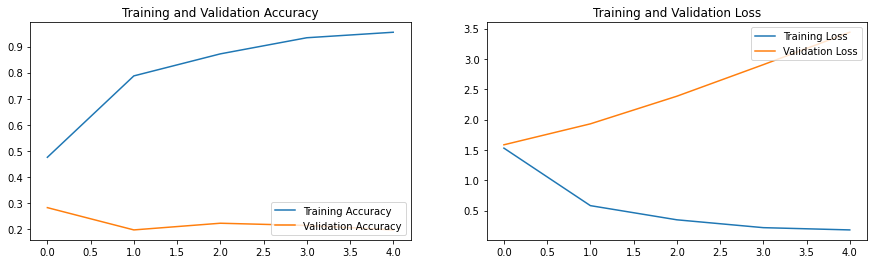

In [88]:
plot(history_conv_3dconv3_1)

In [24]:
#Adding more layers
class Model3DConv_4(ModelGenerator):

    def define_model(self,filter=(3,3,3),dense_neurons=64,dropout=0.25):

        input_shape_model = (self.num_images,self.image_width,self.image_height,3)
        
        model = Sequential()
        model.add(Conv3D(16, filter, padding='same',input_shape=input_shape_model))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(32, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(Conv3D(32, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(64, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(Conv3D(64, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(5,activation='softmax'))

        optimiser = 'adam'
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        K.set_value(model.optimizer.learning_rate,0.0002)

        return model

In [25]:
conv_3dconv4_1=Model3DConv_4()
conv_3dconv4_1.image_size(image_height=120,image_width=120)
conv_3dconv4_1.other_parameters(num_images=15,epochs=5,batch_size=39)
conv_3dconv4_1_model=conv_3dconv4_1.define_model(filter=(3,3,3),dense_neurons=256,dropout=0.25)
conv_3dconv4_1_model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_12 (Conv3D)           (None, 15, 120, 120, 16)  1312      
_________________________________________________________________
activation_12 (Activation)   (None, 15, 120, 120, 16)  0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 15, 120, 120, 16)  64        
_________________________________________________________________
max_pooling3d_12 (MaxPooling (None, 7, 60, 60, 16)     0         
_________________________________________________________________
conv3d_13 (Conv3D)           (None, 7, 60, 60, 32)     13856     
_________________________________________________________________
activation_13 (Activation)   (None, 7, 60, 60, 32)     0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 7, 60, 60, 32)    

In [26]:
print("Total Params:", conv_3dconv4_1_model.count_params())
history_conv_3dconv4_1 = conv_3dconv4_1.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv4_1_model)

Total Params: 3965477
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 39
Epoch 1/5
17/17 [==============================] - ETA: 0s - loss: 1.5713 - categorical_accuracy: 0.4600Source path =  datasets/Project_data/val ; batch size = 39

Epoch 00001: saving model to model_init_2021-05-2504_52_58.979728/model-00001-1.57133-0.46003-1.77193-0.17949.h5
17/17 [==============================] - 74s 4s/step - loss: 1.5713 - categorical_accuracy: 0.4600 - val_loss: 1.7719 - val_categorical_accuracy: 0.1795
Epoch 2/5
17/17 [==============================] - ETA: 0s - loss: 0.5423 - categorical_accuracy: 0.8130
Epoch 00002: saving model to model_init_2021-05-2504_52_58.979728/model-00002-0.54226-0.81297-2.03743-0.23077.h5
17/17 [==============================] - 73s 4s/step - loss: 0.5423 - categorical_accuracy: 0.8130 - val_loss: 2.0374 - val_categorical_accuracy: 0.2308
Epoch 3/5
17/17 [==============================

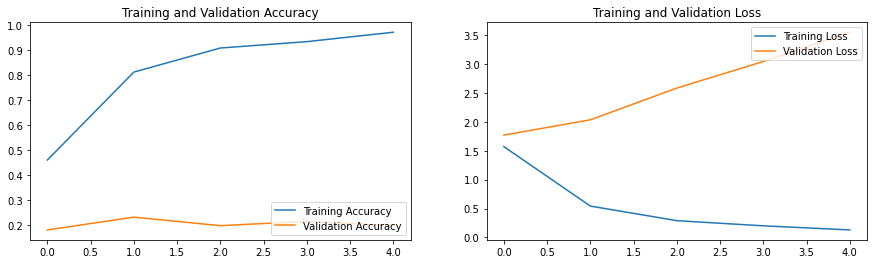

In [28]:
plot(history_conv_3dconv4_1)

In [29]:
conv_3dconv4_2=Model3DConv_4()
conv_3dconv4_2.image_size(image_height=120,image_width=120)
conv_3dconv4_2.other_parameters(num_images=15,epochs=5,batch_size=39)
conv_3dconv4_2_model=conv_3dconv4_2.define_model(filter=(3,3,3),dense_neurons=256,dropout=0.5)
conv_3dconv4_2_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_17 (Conv3D)           (None, 15, 120, 120, 16)  1312      
_________________________________________________________________
activation_17 (Activation)   (None, 15, 120, 120, 16)  0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 15, 120, 120, 16)  64        
_________________________________________________________________
max_pooling3d_15 (MaxPooling (None, 7, 60, 60, 16)     0         
_________________________________________________________________
conv3d_18 (Conv3D)           (None, 7, 60, 60, 32)     13856     
_________________________________________________________________
activation_18 (Activation)   (None, 7, 60, 60, 32)     0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 7, 60, 60, 32)    

In [30]:
print("Total Params:", conv_3dconv4_2_model.count_params())
history_conv_3dconv4_2 = conv_3dconv4_2.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv4_2_model)

Total Params: 3965477
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 39
Epoch 1/5
17/17 [==============================] - ETA: 0s - loss: 2.1068 - categorical_accuracy: 0.3544Source path =  datasets/Project_data/val ; batch size = 39

Epoch 00001: saving model to model_init_2021-05-2505_01_13.046681/model-00001-2.10676-0.35445-1.74864-0.23077.h5
17/17 [==============================] - 73s 4s/step - loss: 2.1068 - categorical_accuracy: 0.3544 - val_loss: 1.7486 - val_categorical_accuracy: 0.2308
Epoch 2/5
17/17 [==============================] - ETA: 0s - loss: 1.1123 - categorical_accuracy: 0.5958
Epoch 00002: saving model to model_init_2021-05-2505_01_13.046681/model-00002-1.11233-0.59578-2.48881-0.20513.h5
17/17 [==============================] - 73s 4s/step - loss: 1.1123 - categorical_accuracy: 0.5958 - val_loss: 2.4888 - val_categorical_accuracy: 0.2051
Epoch 3/5
17/17 [==============================

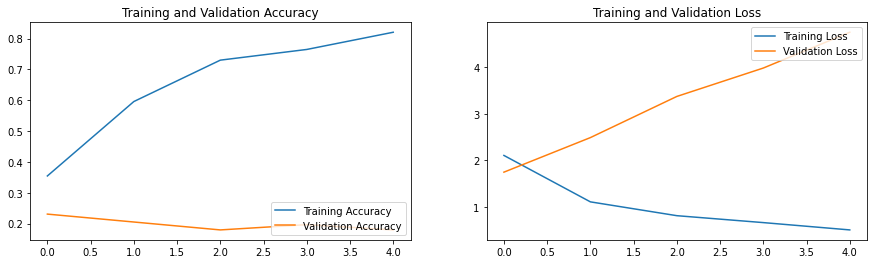

In [31]:
plot(history_conv_3dconv4_2)

In [93]:
#Updating filter size to (2,2,2)
class Model3DConv_5(ModelGenerator):

    def define_model(self,filter=(3,3,3),dense_neurons=64,dropout=0.25):

        input_shape_model = (self.num_images,self.image_width,self.image_height,3)
        
        model = Sequential()
        model.add(Conv3D(16, filter, padding='same',input_shape=input_shape_model))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(32, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(64, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(5,activation='softmax'))

        optimiser = 'adam'
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        K.set_value(model.optimizer.learning_rate,0.0002)

        return model

In [94]:
conv_3dconv5_1=Model3DConv_5()
conv_3dconv5_1.image_size(image_height=120,image_width=120)
conv_3dconv5_1.other_parameters(num_images=15,epochs=5,batch_size=39)
conv_3dconv5_1_model=conv_3dconv5_1.define_model(filter=(2,2,2),dense_neurons=256,dropout=0.25)
conv_3dconv5_1_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_17 (Conv3D)           (None, 15, 120, 120, 16)  400       
_________________________________________________________________
activation_17 (Activation)   (None, 15, 120, 120, 16)  0         
_________________________________________________________________
batch_normalization_62 (Batc (None, 15, 120, 120, 16)  64        
_________________________________________________________________
max_pooling3d_15 (MaxPooling (None, 7, 60, 60, 16)     0         
_________________________________________________________________
conv3d_18 (Conv3D)           (None, 7, 60, 60, 32)     4128      
_________________________________________________________________
activation_18 (Activation)   (None, 7, 60, 60, 32)     0         
_________________________________________________________________
batch_normalization_63 (Batc (None, 7, 60, 60, 32)   

In [95]:
print("Total Params:", conv_3dconv5_1_model.count_params())
history_conv_3dconv5_1 = conv_3dconv5_1.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv5_1_model)

Total Params: 948085
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 39
Epoch 1/5
17/17 [==============================] - ETA: 0s - loss: 1.7308 - categorical_accuracy: 0.3680Source path =  datasets/Project_data/val ; batch size = 39

Epoch 00001: saving model to model_init_2021-05-2412_09_50.232927/model-00001-1.73077-0.36802-1.58582-0.26496.h5
17/17 [==============================] - 73s 4s/step - loss: 1.7308 - categorical_accuracy: 0.3680 - val_loss: 1.5858 - val_categorical_accuracy: 0.2650
Epoch 2/5
17/17 [==============================] - ETA: 0s - loss: 1.0491 - categorical_accuracy: 0.5988
Epoch 00002: saving model to model_init_2021-05-2412_09_50.232927/model-00002-1.04909-0.59879-1.70729-0.30769.h5
17/17 [==============================] - 75s 4s/step - loss: 1.0491 - categorical_accuracy: 0.5988 - val_loss: 1.7073 - val_categorical_accuracy: 0.3077
Epoch 3/5
17/17 [==============================]

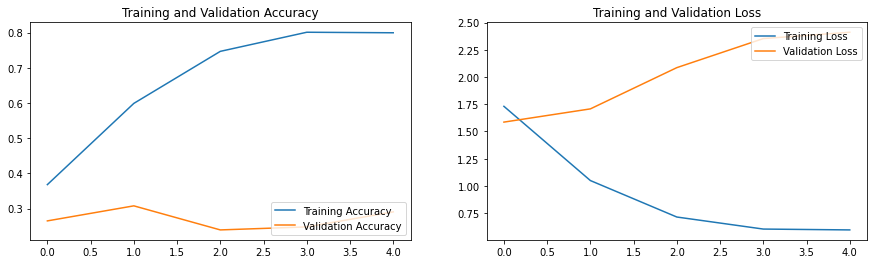

In [96]:
plot(history_conv_3dconv5_1)

In [15]:
#Adding dropout layers to avoid overfitting
class Model3DConv_6(ModelGenerator):

    def define_model(self,filter=(3,3,3),dense_neurons=64,dropout=0.25):

        input_shape_model = (self.num_images,self.image_width,self.image_height,3)
        
        model = Sequential()
        model.add(Conv3D(16, filter, padding='same',input_shape=input_shape_model))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Dropout(dropout))

        model.add(Conv3D(32, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Dropout(dropout))

        model.add(Conv3D(64, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Dropout(dropout))

        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(5,activation='softmax'))

        optimiser = 'adam'
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        K.set_value(model.optimizer.learning_rate,0.0002)

        return model

In [98]:
conv_3dconv6_1=Model3DConv_6()
conv_3dconv6_1.image_size(image_height=120,image_width=120)
conv_3dconv6_1.other_parameters(num_images=15,epochs=5,batch_size=39)
conv_3dconv6_1_model=conv_3dconv6_1.define_model(filter=(3,3,3),dense_neurons=64,dropout=0.25)
conv_3dconv6_1_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_20 (Conv3D)           (None, 15, 120, 120, 16)  1312      
_________________________________________________________________
activation_20 (Activation)   (None, 15, 120, 120, 16)  0         
_________________________________________________________________
batch_normalization_67 (Batc (None, 15, 120, 120, 16)  64        
_________________________________________________________________
max_pooling3d_18 (MaxPooling (None, 7, 60, 60, 16)     0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 7, 60, 60, 16)     0         
_________________________________________________________________
conv3d_21 (Conv3D)           (None, 7, 60, 60, 32)     13856     
_________________________________________________________________
activation_21 (Activation)   (None, 7, 60, 60, 32)   

In [99]:
print("Total Params:", conv_3dconv6_1_model.count_params())
history_conv_3dconv6_1 = conv_3dconv6_1.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv6_1_model)

Total Params: 997637
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 39
Epoch 1/5
17/17 [==============================] - ETA: 0s - loss: 2.0706 - categorical_accuracy: 0.2383Source path =  datasets/Project_data/val ; batch size = 39

Epoch 00001: saving model to model_init_2021-05-2412_16_11.689654/model-00001-2.07061-0.23831-1.60446-0.20513.h5
17/17 [==============================] - 76s 4s/step - loss: 2.0706 - categorical_accuracy: 0.2383 - val_loss: 1.6045 - val_categorical_accuracy: 0.2051
Epoch 2/5
17/17 [==============================] - ETA: 0s - loss: 1.6568 - categorical_accuracy: 0.3514
Epoch 00002: saving model to model_init_2021-05-2412_16_11.689654/model-00002-1.65679-0.35143-1.59411-0.27350.h5
17/17 [==============================] - 76s 4s/step - loss: 1.6568 - categorical_accuracy: 0.3514 - val_loss: 1.5941 - val_categorical_accuracy: 0.2735
Epoch 3/5
17/17 [==============================]

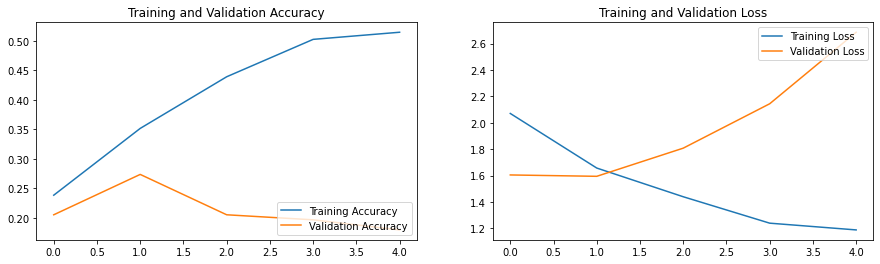

In [100]:
plot(history_conv_3dconv6_1)

In [101]:
#increasing dropout value
conv_3dconv6_2=Model3DConv_6()
conv_3dconv6_2.image_size(image_height=120,image_width=120)
conv_3dconv6_2.other_parameters(num_images=15,epochs=5,batch_size=39)
conv_3dconv6_2_model=conv_3dconv6_2.define_model(filter=(3,3,3),dense_neurons=64,dropout=0.5)
conv_3dconv6_2_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_23 (Conv3D)           (None, 15, 120, 120, 16)  1312      
_________________________________________________________________
activation_23 (Activation)   (None, 15, 120, 120, 16)  0         
_________________________________________________________________
batch_normalization_72 (Batc (None, 15, 120, 120, 16)  64        
_________________________________________________________________
max_pooling3d_21 (MaxPooling (None, 7, 60, 60, 16)     0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 7, 60, 60, 16)     0         
_________________________________________________________________
conv3d_24 (Conv3D)           (None, 7, 60, 60, 32)     13856     
_________________________________________________________________
activation_24 (Activation)   (None, 7, 60, 60, 32)   

In [102]:
print("Total Params:", conv_3dconv6_2_model.count_params())
history_conv_3dconv6_2 = conv_3dconv6_2.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv6_2_model)

Total Params: 997637
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 39
Epoch 1/5
17/17 [==============================] - ETA: 0s - loss: 2.5184 - categorical_accuracy: 0.2323Source path =  datasets/Project_data/val ; batch size = 39

Epoch 00001: saving model to model_init_2021-05-2412_26_57.357740/model-00001-2.51836-0.23228-1.61390-0.23932.h5
17/17 [==============================] - 78s 5s/step - loss: 2.5184 - categorical_accuracy: 0.2323 - val_loss: 1.6139 - val_categorical_accuracy: 0.2393
Epoch 2/5
17/17 [==============================] - ETA: 0s - loss: 2.3542 - categorical_accuracy: 0.2775
Epoch 00002: saving model to model_init_2021-05-2412_26_57.357740/model-00002-2.35423-0.27753-2.11344-0.18803.h5
17/17 [==============================] - 78s 5s/step - loss: 2.3542 - categorical_accuracy: 0.2775 - val_loss: 2.1134 - val_categorical_accuracy: 0.1880
Epoch 3/5
17/17 [==============================]

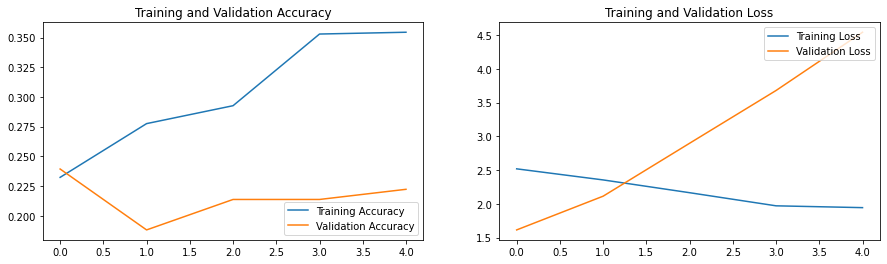

In [103]:
plot(history_conv_3dconv6_2)

In [104]:
#increasing batch size with same dropout value
conv_3dconv6_3=Model3DConv_6()
conv_3dconv6_3.image_size(image_height=120,image_width=120)
conv_3dconv6_3.other_parameters(num_images=15,epochs=5,batch_size=51)
conv_3dconv6_3_model=conv_3dconv6_3.define_model(filter=(3,3,3),dense_neurons=64,dropout=0.5)
conv_3dconv6_3_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_26 (Conv3D)           (None, 15, 120, 120, 16)  1312      
_________________________________________________________________
activation_26 (Activation)   (None, 15, 120, 120, 16)  0         
_________________________________________________________________
batch_normalization_77 (Batc (None, 15, 120, 120, 16)  64        
_________________________________________________________________
max_pooling3d_24 (MaxPooling (None, 7, 60, 60, 16)     0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 7, 60, 60, 16)     0         
_________________________________________________________________
conv3d_27 (Conv3D)           (None, 7, 60, 60, 32)     13856     
_________________________________________________________________
activation_27 (Activation)   (None, 7, 60, 60, 32)   

In [105]:
print("Total Params:", conv_3dconv6_3_model.count_params())
history_conv_3dconv6_3 = conv_3dconv6_3.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv6_3_model)

Total Params: 997637
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 51
Epoch 1/5
13/13 [==============================] - ETA: 0s - loss: 2.6075 - categorical_accuracy: 0.2081Source path =  datasets/Project_data/val ; batch size = 51

Epoch 00001: saving model to model_init_2021-05-2412_37_27.908426/model-00001-2.60751-0.20814-1.62212-0.15686.h5
13/13 [==============================] - 76s 6s/step - loss: 2.6075 - categorical_accuracy: 0.2081 - val_loss: 1.6221 - val_categorical_accuracy: 0.1569
Epoch 2/5
13/13 [==============================] - ETA: 0s - loss: 2.2690 - categorical_accuracy: 0.2624
Epoch 00002: saving model to model_init_2021-05-2412_37_27.908426/model-00002-2.26900-0.26244-1.99241-0.16667.h5
13/13 [==============================] - 74s 6s/step - loss: 2.2690 - categorical_accuracy: 0.2624 - val_loss: 1.9924 - val_categorical_accuracy: 0.1667
Epoch 3/5
13/13 [==============================]

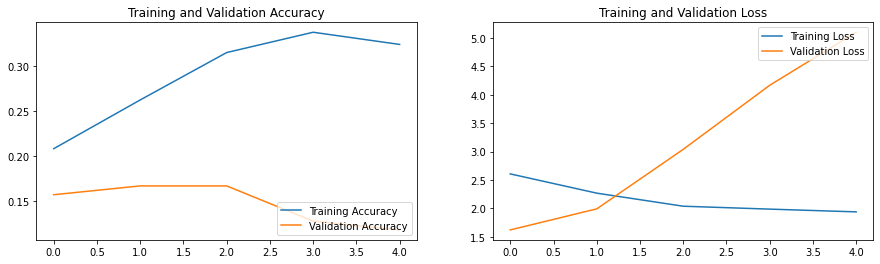

In [106]:
plot(history_conv_3dconv6_3)

In [107]:
#training for high value of epochs of aorund 15
conv_3dconv6_4=Model3DConv_6()
conv_3dconv6_4.image_size(image_height=120,image_width=120)
conv_3dconv6_4.other_parameters(num_images=15,epochs=15,batch_size=39)
conv_3dconv6_4_model=conv_3dconv6_4.define_model(filter=(3,3,3),dense_neurons=64,dropout=0.5)
conv_3dconv6_4_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_29 (Conv3D)           (None, 15, 120, 120, 16)  1312      
_________________________________________________________________
activation_29 (Activation)   (None, 15, 120, 120, 16)  0         
_________________________________________________________________
batch_normalization_82 (Batc (None, 15, 120, 120, 16)  64        
_________________________________________________________________
max_pooling3d_27 (MaxPooling (None, 7, 60, 60, 16)     0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 7, 60, 60, 16)     0         
_________________________________________________________________
conv3d_30 (Conv3D)           (None, 7, 60, 60, 32)     13856     
_________________________________________________________________
activation_30 (Activation)   (None, 7, 60, 60, 32)   

In [108]:
print("Total Params:", conv_3dconv6_4_model.count_params())
history_conv_3dconv6_4 = conv_3dconv6_4.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv6_4_model)

Total Params: 997637
# training sequences = 663
# validation sequences = 100
# epochs = 15
Source path =  datasets/Project_data/train ; batch size = 39
Epoch 1/15
17/17 [==============================] - ETA: 0s - loss: 2.5453 - categorical_accuracy: 0.2368Source path =  datasets/Project_data/val ; batch size = 39

Epoch 00001: saving model to model_init_2021-05-2412_45_30.042021/model-00001-2.54531-0.23680-1.71821-0.13675.h5
17/17 [==============================] - 82s 5s/step - loss: 2.5453 - categorical_accuracy: 0.2368 - val_loss: 1.7182 - val_categorical_accuracy: 0.1368
Epoch 2/15
17/17 [==============================] - ETA: 0s - loss: 2.1941 - categorical_accuracy: 0.3122
Epoch 00002: saving model to model_init_2021-05-2412_45_30.042021/model-00002-2.19408-0.31222-1.96554-0.30769.h5
17/17 [==============================] - 79s 5s/step - loss: 2.1941 - categorical_accuracy: 0.3122 - val_loss: 1.9655 - val_categorical_accuracy: 0.3077
Epoch 3/15
17/17 [===========================

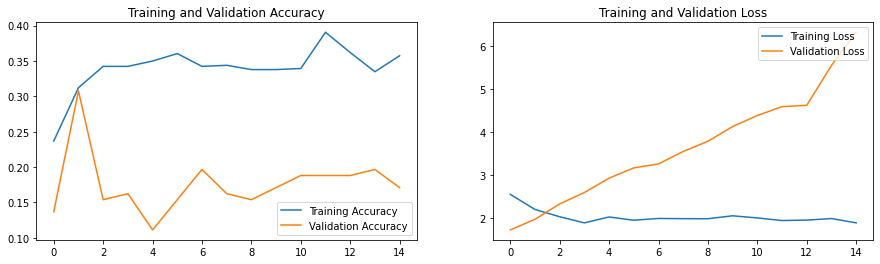

In [109]:
plot(history_conv_3dconv6_4)

In [110]:
#training for high value of epochs of around 25
conv_3dconv6_5=Model3DConv_6()
conv_3dconv6_5.image_size(image_height=120,image_width=120)
conv_3dconv6_5.other_parameters(num_images=15,epochs=25,batch_size=39)
conv_3dconv6_5_model=conv_3dconv6_5.define_model(filter=(3,3,3),dense_neurons=64,dropout=0.5)
conv_3dconv6_5_model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_32 (Conv3D)           (None, 15, 120, 120, 16)  1312      
_________________________________________________________________
activation_32 (Activation)   (None, 15, 120, 120, 16)  0         
_________________________________________________________________
batch_normalization_87 (Batc (None, 15, 120, 120, 16)  64        
_________________________________________________________________
max_pooling3d_30 (MaxPooling (None, 7, 60, 60, 16)     0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 7, 60, 60, 16)     0         
_________________________________________________________________
conv3d_33 (Conv3D)           (None, 7, 60, 60, 32)     13856     
_________________________________________________________________
activation_33 (Activation)   (None, 7, 60, 60, 32)   

In [111]:
print("Total Params:", conv_3dconv6_5_model.count_params())
history_conv_3dconv6_5 = conv_3dconv6_5.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv6_5_model)

Total Params: 997637
# training sequences = 663
# validation sequences = 100
# epochs = 25
Source path =  datasets/Project_data/train ; batch size = 39
Epoch 1/25
17/17 [==============================] - ETA: 0s - loss: 2.5368 - categorical_accuracy: 0.2278Source path =  datasets/Project_data/val ; batch size = 39

Epoch 00001: saving model to model_init_2021-05-2413_05_17.006439/model-00001-2.53678-0.22775-1.59801-0.22222.h5
17/17 [==============================] - 77s 5s/step - loss: 2.5368 - categorical_accuracy: 0.2278 - val_loss: 1.5980 - val_categorical_accuracy: 0.2222
Epoch 2/25
17/17 [==============================] - ETA: 0s - loss: 2.1703 - categorical_accuracy: 0.2775
Epoch 00002: saving model to model_init_2021-05-2413_05_17.006439/model-00002-2.17033-0.27753-1.82813-0.25641.h5
17/17 [==============================] - 78s 5s/step - loss: 2.1703 - categorical_accuracy: 0.2775 - val_loss: 1.8281 - val_categorical_accuracy: 0.2564
Epoch 3/25
17/17 [===========================

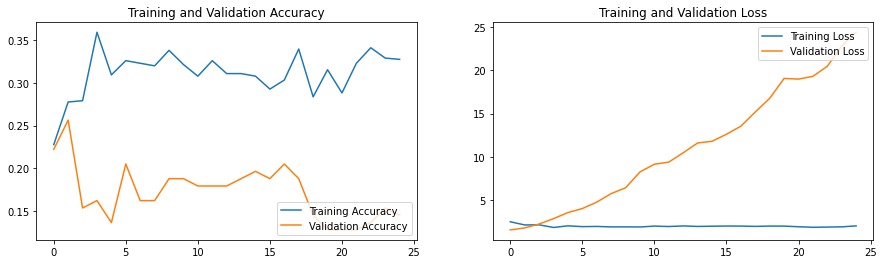

In [112]:
plot(history_conv_3dconv6_5)

In [115]:
#training for dropout value of 0.4
conv_3dconv6_6=Model3DConv_6()
conv_3dconv6_6.image_size(image_height=120,image_width=120)
conv_3dconv6_6.other_parameters(num_images=15,epochs=5,batch_size=39)
conv_3dconv6_6_model=conv_3dconv6_6.define_model(filter=(3,3,3),dense_neurons=64,dropout=0.4)
conv_3dconv6_6_model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_38 (Conv3D)           (None, 15, 120, 120, 16)  1312      
_________________________________________________________________
activation_38 (Activation)   (None, 15, 120, 120, 16)  0         
_________________________________________________________________
batch_normalization_97 (Batc (None, 15, 120, 120, 16)  64        
_________________________________________________________________
max_pooling3d_36 (MaxPooling (None, 7, 60, 60, 16)     0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 7, 60, 60, 16)     0         
_________________________________________________________________
conv3d_39 (Conv3D)           (None, 7, 60, 60, 32)     13856     
_________________________________________________________________
activation_39 (Activation)   (None, 7, 60, 60, 32)   

In [116]:
print("Total Params:", conv_3dconv6_6_model.count_params())
history_conv_3dconv6_6 = conv_3dconv6_6.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv6_6_model)

Total Params: 997637
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 39
Epoch 1/5
17/17 [==============================] - ETA: 0s - loss: 2.2637 - categorical_accuracy: 0.2624Source path =  datasets/Project_data/val ; batch size = 39

Epoch 00001: saving model to model_init_2021-05-2413_56_28.207005/model-00001-2.26366-0.26244-1.69272-0.22222.h5
17/17 [==============================] - 76s 4s/step - loss: 2.2637 - categorical_accuracy: 0.2624 - val_loss: 1.6927 - val_categorical_accuracy: 0.2222
Epoch 2/5
17/17 [==============================] - ETA: 0s - loss: 2.0126 - categorical_accuracy: 0.3363
Epoch 00002: saving model to model_init_2021-05-2413_56_28.207005/model-00002-2.01264-0.33635-2.26605-0.19658.h5
17/17 [==============================] - 76s 4s/step - loss: 2.0126 - categorical_accuracy: 0.3363 - val_loss: 2.2661 - val_categorical_accuracy: 0.1966
Epoch 3/5
17/17 [==============================]

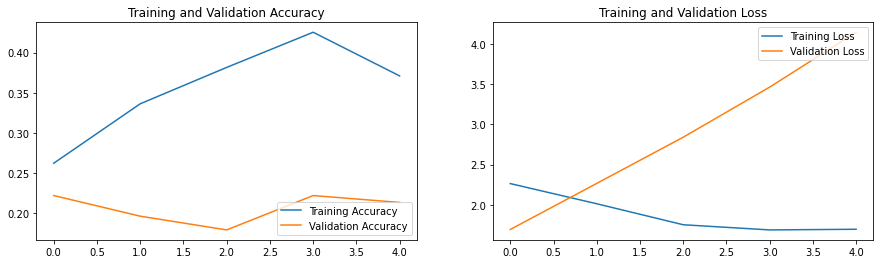

In [117]:
plot(history_conv_3dconv6_6)

In [118]:
#training for dense neurons 256
conv_3dconv6_7=Model3DConv_6()
conv_3dconv6_7.image_size(image_height=120,image_width=120)
conv_3dconv6_7.other_parameters(num_images=15,epochs=5,batch_size=39)
conv_3dconv6_7_model=conv_3dconv6_7.define_model(filter=(3,3,3),dense_neurons=256,dropout=0.4)
conv_3dconv6_7_model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_41 (Conv3D)           (None, 15, 120, 120, 16)  1312      
_________________________________________________________________
activation_41 (Activation)   (None, 15, 120, 120, 16)  0         
_________________________________________________________________
batch_normalization_102 (Bat (None, 15, 120, 120, 16)  64        
_________________________________________________________________
max_pooling3d_39 (MaxPooling (None, 7, 60, 60, 16)     0         
_________________________________________________________________
dropout_61 (Dropout)         (None, 7, 60, 60, 16)     0         
_________________________________________________________________
conv3d_42 (Conv3D)           (None, 7, 60, 60, 32)     13856     
_________________________________________________________________
activation_42 (Activation)   (None, 7, 60, 60, 32)   

In [119]:
print("Total Params:", conv_3dconv6_7_model.count_params())
history_conv_3dconv6_7 = conv_3dconv6_7.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv6_7_model)

Total Params: 3826757
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 39
Epoch 1/5
17/17 [==============================] - ETA: 0s - loss: 2.3111 - categorical_accuracy: 0.2474Source path =  datasets/Project_data/val ; batch size = 39

Epoch 00001: saving model to model_init_2021-05-2414_02_52.567889/model-00001-2.31106-0.24736-1.70633-0.23077.h5
17/17 [==============================] - 77s 5s/step - loss: 2.3111 - categorical_accuracy: 0.2474 - val_loss: 1.7063 - val_categorical_accuracy: 0.2308
Epoch 2/5
17/17 [==============================] - ETA: 0s - loss: 1.7150 - categorical_accuracy: 0.4329
Epoch 00002: saving model to model_init_2021-05-2414_02_52.567889/model-00002-1.71501-0.43288-3.37547-0.20513.h5
17/17 [==============================] - 75s 4s/step - loss: 1.7150 - categorical_accuracy: 0.4329 - val_loss: 3.3755 - val_categorical_accuracy: 0.2051
Epoch 3/5
17/17 [==============================

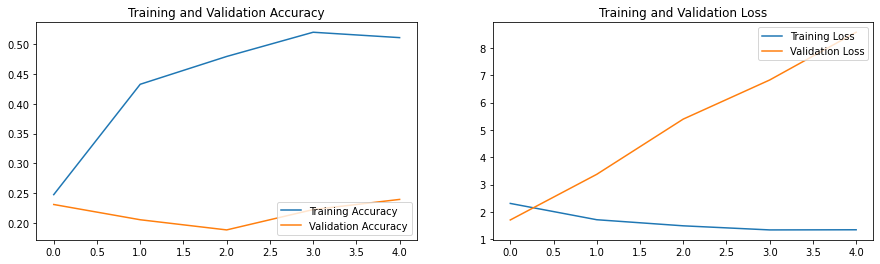

In [120]:
plot(history_conv_3dconv6_7)

In [17]:
#training for dense neurons 256
conv_3dconv6_8=Model3DConv_6()
conv_3dconv6_8.image_size(image_height=120,image_width=120)
conv_3dconv6_8.other_parameters(num_images=15,epochs=5,batch_size=39)
conv_3dconv6_8_model=conv_3dconv6_8.define_model(filter=(3,3,3),dense_neurons=256,dropout=0.5)
conv_3dconv6_8_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 15, 120, 120, 16)  1312      
_________________________________________________________________
activation (Activation)      (None, 15, 120, 120, 16)  0         
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 120, 120, 16)  64        
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 7, 60, 60, 16)     0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 60, 60, 16)     0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 7, 60, 60, 32)     13856     
_________________________________________________________________
activation_1 (Activation)    (None, 7, 60, 60, 32)     0

In [18]:
print("Total Params:", conv_3dconv6_8_model.count_params())
history_conv_3dconv6_8 = conv_3dconv6_8.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv6_8_model)

Total Params: 3826757
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 39
Epoch 1/5
17/17 [==============================] - ETA: 0s - loss: 2.3779 - categorical_accuracy: 0.2640Source path =  datasets/Project_data/val ; batch size = 39

Epoch 00001: saving model to model_init_2021-05-2414_24_55.065037/model-00001-2.37786-0.26395-1.82356-0.17094.h5
17/17 [==============================] - 72s 4s/step - loss: 2.3779 - categorical_accuracy: 0.2640 - val_loss: 1.8236 - val_categorical_accuracy: 0.1709
Epoch 2/5
17/17 [==============================] - ETA: 0s - loss: 2.0336 - categorical_accuracy: 0.3876
Epoch 00002: saving model to model_init_2021-05-2414_24_55.065037/model-00002-2.03356-0.38763-2.67015-0.21368.h5
17/17 [==============================] - 75s 4s/step - loss: 2.0336 - categorical_accuracy: 0.3876 - val_loss: 2.6701 - val_categorical_accuracy: 0.2137
Epoch 3/5
17/17 [==============================

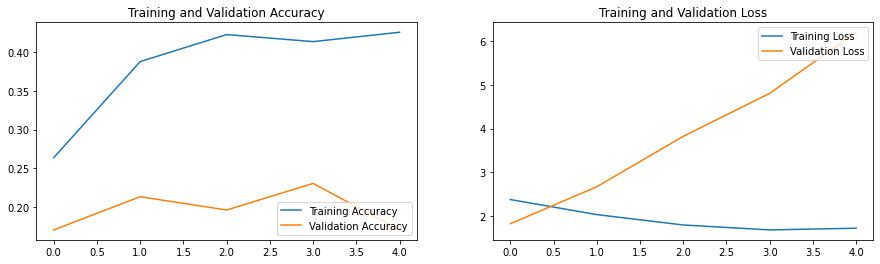

In [19]:
plot(history_conv_3dconv6_8)

In [16]:
#training for dense neurons 256
conv_3dconv6_9=Model3DConv_6()
conv_3dconv6_9.image_size(image_height=120,image_width=120)
conv_3dconv6_9.other_parameters(num_images=15,epochs=5,batch_size=39)
conv_3dconv6_9_model=conv_3dconv6_9.define_model(filter=(3,3,3),dense_neurons=256,dropout=0.3)
conv_3dconv6_9_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 15, 120, 120, 16)  1312      
_________________________________________________________________
activation (Activation)      (None, 15, 120, 120, 16)  0         
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 120, 120, 16)  64        
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 7, 60, 60, 16)     0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 60, 60, 16)     0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 7, 60, 60, 32)     13856     
_________________________________________________________________
activation_1 (Activation)    (None, 7, 60, 60, 32)     0

In [17]:
print("Total Params:", conv_3dconv6_9_model.count_params())
history_conv_3dconv6_9 = conv_3dconv6_9.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv6_9_model)

Total Params: 3826757
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 39
Epoch 1/5
17/17 [==============================] - ETA: 0s - loss: 1.8354 - categorical_accuracy: 0.3786Source path =  datasets/Project_data/val ; batch size = 39

Epoch 00001: saving model to model_init_2021-05-2504_11_30.307734/model-00001-1.83539-0.37858-2.02952-0.17094.h5
17/17 [==============================] - 73s 4s/step - loss: 1.8354 - categorical_accuracy: 0.3786 - val_loss: 2.0295 - val_categorical_accuracy: 0.1709
Epoch 2/5
17/17 [==============================] - ETA: 0s - loss: 1.3470 - categorical_accuracy: 0.4962
Epoch 00002: saving model to model_init_2021-05-2504_11_30.307734/model-00002-1.34704-0.49623-3.29521-0.21368.h5
17/17 [==============================] - 75s 4s/step - loss: 1.3470 - categorical_accuracy: 0.4962 - val_loss: 3.2952 - val_categorical_accuracy: 0.2137
Epoch 3/5
17/17 [==============================

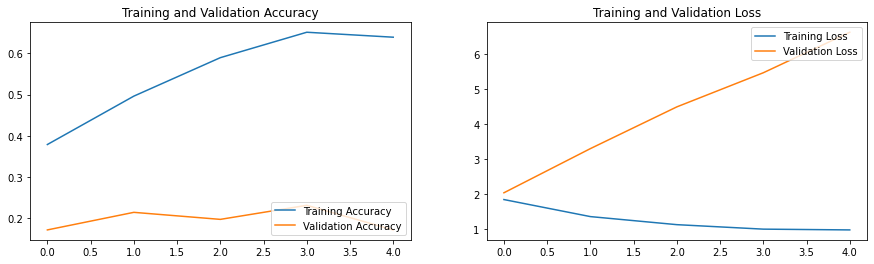

In [18]:
plot(history_conv_3dconv6_9)

In [32]:
#Updating image size 
conv_3dconv6_10=Model3DConv_6()
conv_3dconv6_10.image_size(image_height=160,image_width=160)
conv_3dconv6_10.other_parameters(num_images=15,epochs=5,batch_size=39)
conv_3dconv6_10_model=conv_3dconv6_10.define_model(filter=(3,3,3),dense_neurons=256,dropout=0.5)
conv_3dconv6_10_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_22 (Conv3D)           (None, 15, 160, 160, 16)  1312      
_________________________________________________________________
activation_22 (Activation)   (None, 15, 160, 160, 16)  0         
_________________________________________________________________
batch_normalization_34 (Batc (None, 15, 160, 160, 16)  64        
_________________________________________________________________
max_pooling3d_18 (MaxPooling (None, 7, 80, 80, 16)     0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 7, 80, 80, 16)     0         
_________________________________________________________________
conv3d_23 (Conv3D)           (None, 7, 80, 80, 32)     13856     
_________________________________________________________________
activation_23 (Activation)   (None, 7, 80, 80, 32)    

In [33]:
print("Total Params:", conv_3dconv6_10_model.count_params())
history_conv_3dconv6_10 = conv_3dconv6_10.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv6_10_model)

Total Params: 6693957
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 39
Epoch 1/5
17/17 [==============================] - ETA: 0s - loss: 2.3722 - categorical_accuracy: 0.2836Source path =  datasets/Project_data/val ; batch size = 39

Epoch 00001: saving model to model_init_2021-05-2505_15_47.852196/model-00001-2.37220-0.28356-1.76287-0.23077.h5
17/17 [==============================] - 82s 5s/step - loss: 2.3722 - categorical_accuracy: 0.2836 - val_loss: 1.7629 - val_categorical_accuracy: 0.2308
Epoch 2/5
17/17 [==============================] - ETA: 0s - loss: 1.9667 - categorical_accuracy: 0.3786
Epoch 00002: saving model to model_init_2021-05-2505_15_47.852196/model-00002-1.96665-0.37858-2.95635-0.23077.h5
17/17 [==============================] - 82s 5s/step - loss: 1.9667 - categorical_accuracy: 0.3786 - val_loss: 2.9564 - val_categorical_accuracy: 0.2308
Epoch 3/5
17/17 [==============================

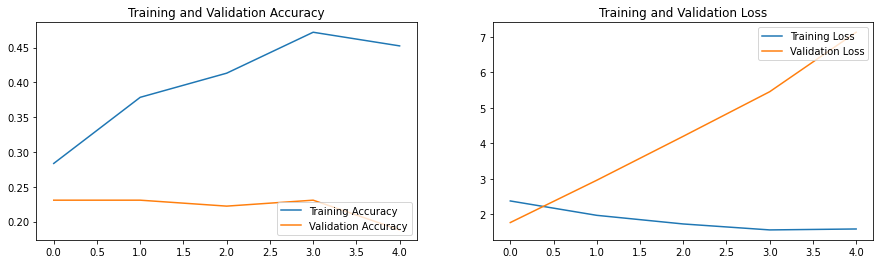

In [34]:
plot(history_conv_3dconv6_10)

In [19]:
#Adding more layers
class Model3DConv_7(ModelGenerator):

    def define_model(self,filter=(3,3,3),dense_neurons=64,dropout=0.25):

        input_shape_model = (self.num_images,self.image_width,self.image_height,3)
        
        model = Sequential()
        model.add(Conv3D(16, filter, padding='same',input_shape=input_shape_model))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Dropout(dropout))

        model.add(Conv3D(32, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Dropout(dropout))

        model.add(Conv3D(64, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Dropout(dropout))
        
        model.add(Conv3D(128, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Dropout(dropout))

        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(5,activation='softmax'))

        optimiser = 'adam'
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        K.set_value(model.optimizer.learning_rate,0.0002)

        return model

In [20]:
#Updating image size on adding another layer as the parameters were going neagative after max pooling
conv_3dconv7_1=Model3DConv_7()
conv_3dconv7_1.image_size(image_height=160,image_width=160)
conv_3dconv7_1.other_parameters(num_images=18,epochs=5,batch_size=39)
conv_3dconv7_1_model=conv_3dconv7_1.define_model(filter=(3,3,3),dense_neurons=256,dropout=0.5)
conv_3dconv7_1_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_4 (Conv3D)            (None, 18, 160, 160, 16)  1312      
_________________________________________________________________
activation_4 (Activation)    (None, 18, 160, 160, 16)  0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 18, 160, 160, 16)  64        
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 9, 80, 80, 16)     0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 9, 80, 80, 16)     0         
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 9, 80, 80, 32)     13856     
_________________________________________________________________
activation_5 (Activation)    (None, 9, 80, 80, 32)    

In [21]:
print("Total Params:", conv_3dconv7_1_model.count_params())
history_conv_3dconv7_1 = conv_3dconv7_1.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv7_1_model)

Total Params: 3638981
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 39
Epoch 1/5
17/17 [==============================] - ETA: 0s - loss: 2.5514 - categorical_accuracy: 0.2323Source path =  datasets/Project_data/val ; batch size = 39

Epoch 00001: saving model to model_init_2021-05-2611_00_54.806320/model-00001-2.55137-0.23228-1.71835-0.19000.h5
17/17 [==============================] - 99s 6s/step - loss: 2.5514 - categorical_accuracy: 0.2323 - val_loss: 1.7184 - val_categorical_accuracy: 0.1900
Epoch 2/5
17/17 [==============================] - ETA: 0s - loss: 2.0167 - categorical_accuracy: 0.3409
Epoch 00002: saving model to model_init_2021-05-2611_00_54.806320/model-00002-2.01667-0.34087-2.60216-0.12000.h5
17/17 [==============================] - 99s 6s/step - loss: 2.0167 - categorical_accuracy: 0.3409 - val_loss: 2.6022 - val_categorical_accuracy: 0.1200
Epoch 3/5
17/17 [==============================

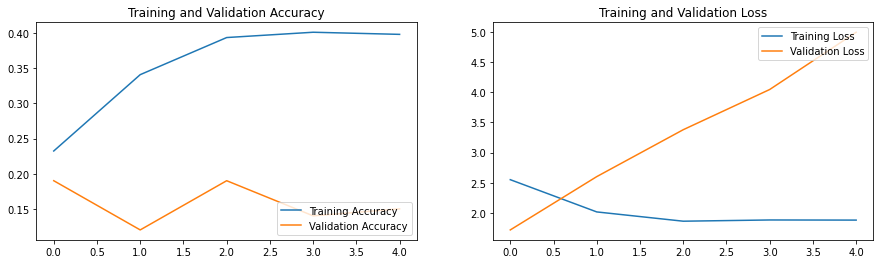

In [22]:
plot(history_conv_3dconv7_1)

In [15]:
#Adding more layers
class Model3DConv_8(ModelGenerator):

    def define_model(self,filter=(3,3,3),dense_neurons=64,dropout=0.25):

        input_shape_model = (self.num_images,self.image_width,self.image_height,3)
        
        model = Sequential()
        model.add(Conv3D(16, filter, padding='same',input_shape=input_shape_model))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(32, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(64, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        
        model.add(Conv3D(128, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(5,activation='softmax'))

        optimiser = 'adam'
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        K.set_value(model.optimizer.learning_rate,0.0002)

        return model

In [23]:
conv_3dconv8_1=Model3DConv_8()
conv_3dconv8_1.image_size(image_height=160,image_width=160)
conv_3dconv8_1.other_parameters(num_images=18,epochs=5,batch_size=39)
conv_3dconv8_1_model=conv_3dconv8_1.define_model(filter=(3,3,3),dense_neurons=256,dropout=0.2)
conv_3dconv8_1_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_8 (Conv3D)            (None, 18, 160, 160, 16)  1312      
_________________________________________________________________
activation_8 (Activation)    (None, 18, 160, 160, 16)  0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 18, 160, 160, 16)  64        
_________________________________________________________________
max_pooling3d_8 (MaxPooling3 (None, 9, 80, 80, 16)     0         
_________________________________________________________________
conv3d_9 (Conv3D)            (None, 9, 80, 80, 32)     13856     
_________________________________________________________________
activation_9 (Activation)    (None, 9, 80, 80, 32)     0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 9, 80, 80, 32)    

In [24]:
print("Total Params:", conv_3dconv8_1_model.count_params())
history_conv_3dconv8_1 = conv_3dconv8_1.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv8_1_model)

Total Params: 3638981
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 39
Epoch 1/5
17/17 [==============================] - ETA: 0s - loss: 1.4452 - categorical_accuracy: 0.5249Source path =  datasets/Project_data/val ; batch size = 39

Epoch 00001: saving model to model_init_2021-05-2611_09_11.625544/model-00001-1.44519-0.52489-1.73529-0.18000.h5
17/17 [==============================] - 101s 6s/step - loss: 1.4452 - categorical_accuracy: 0.5249 - val_loss: 1.7353 - val_categorical_accuracy: 0.1800
Epoch 2/5
17/17 [==============================] - ETA: 0s - loss: 0.5478 - categorical_accuracy: 0.8054
Epoch 00002: saving model to model_init_2021-05-2611_09_11.625544/model-00002-0.54780-0.80543-2.26641-0.17000.h5
17/17 [==============================] - 101s 6s/step - loss: 0.5478 - categorical_accuracy: 0.8054 - val_loss: 2.2664 - val_categorical_accuracy: 0.1700
Epoch 3/5
17/17 [============================

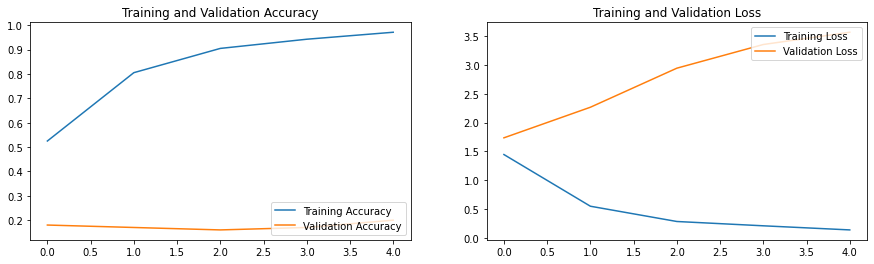

In [25]:
plot(history_conv_3dconv8_1)

In [45]:
#Updating batch size
conv_3dconv8_2=Model3DConv_8()
conv_3dconv8_2.image_size(image_height=160,image_width=160)
conv_3dconv8_2.other_parameters(num_images=18,epochs=5,batch_size=20)
conv_3dconv8_2_model=conv_3dconv8_2.define_model(filter=(3,3,3),dense_neurons=256,dropout=0.5)
conv_3dconv8_2_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_37 (Conv3D)           (None, 18, 160, 160, 16)  1312      
_________________________________________________________________
activation_37 (Activation)   (None, 18, 160, 160, 16)  0         
_________________________________________________________________
batch_normalization_55 (Batc (None, 18, 160, 160, 16)  64        
_________________________________________________________________
max_pooling3d_33 (MaxPooling (None, 9, 80, 80, 16)     0         
_________________________________________________________________
conv3d_38 (Conv3D)           (None, 9, 80, 80, 32)     13856     
_________________________________________________________________
activation_38 (Activation)   (None, 9, 80, 80, 32)     0         
_________________________________________________________________
batch_normalization_56 (Batc (None, 9, 80, 80, 32)   

In [46]:
print("Total Params:", conv_3dconv8_2_model.count_params())
history_conv_3dconv8_2 = conv_3dconv8_2.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv8_2_model)

Total Params: 3638981
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 20
Epoch 1/5
34/34 [==============================] - ETA: 0s - loss: 1.9661 - categorical_accuracy: 0.3618Source path =  datasets/Project_data/val ; batch size = 20

Epoch 00001: saving model to model_init_2021-05-2505_48_54.098648/model-00001-1.96614-0.36176-2.44104-0.23000.h5
34/34 [==============================] - 98s 3s/step - loss: 1.9661 - categorical_accuracy: 0.3618 - val_loss: 2.4410 - val_categorical_accuracy: 0.2300
Epoch 2/5
34/34 [==============================] - ETA: 0s - loss: 1.2852 - categorical_accuracy: 0.5441
Epoch 00002: saving model to model_init_2021-05-2505_48_54.098648/model-00002-1.28516-0.54412-4.63132-0.21000.h5
34/34 [==============================] - 97s 3s/step - loss: 1.2852 - categorical_accuracy: 0.5441 - val_loss: 4.6313 - val_categorical_accuracy: 0.2100
Epoch 3/5
34/34 [==============================

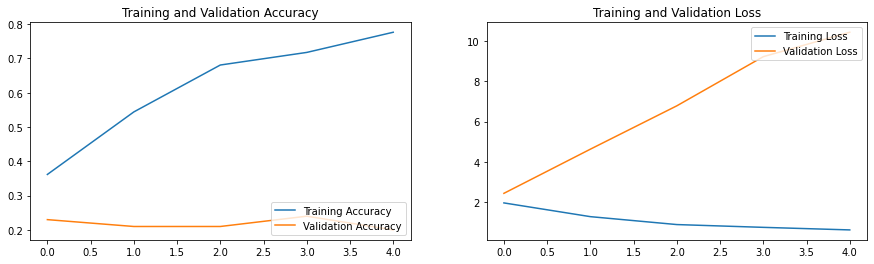

In [47]:
plot(history_conv_3dconv8_2)

In [21]:
#Adding dropout to Model 8
class Model3DConv_9(ModelGenerator):

    def define_model(self,filter=(3,3,3),dense_neurons=64,dropout=0.25):

        input_shape_model = (self.num_images,self.image_width,self.image_height,3)
        
        model = Sequential()
        model.add(Conv3D(16, filter, padding='same',input_shape=input_shape_model))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Dropout(dropout))
        
        model.add(Conv3D(32, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Dropout(dropout))
        
        model.add(Conv3D(64, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Dropout(dropout))
        
        model.add(Conv3D(128, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Dropout(dropout))
        
        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(5,activation='softmax'))

        optimiser = 'adam'
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        K.set_value(model.optimizer.learning_rate,0.0002)

        return model

In [50]:
#Updating batch size
conv_3dconv9_1=Model3DConv_9()
conv_3dconv9_1.image_size(image_height=160,image_width=160)
conv_3dconv9_1.other_parameters(num_images=18,epochs=5,batch_size=20)
conv_3dconv9_1_model=conv_3dconv9_1.define_model(filter=(3,3,3),dense_neurons=256,dropout=0.5)
conv_3dconv9_1_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_41 (Conv3D)           (None, 18, 160, 160, 16)  1312      
_________________________________________________________________
activation_41 (Activation)   (None, 18, 160, 160, 16)  0         
_________________________________________________________________
batch_normalization_61 (Batc (None, 18, 160, 160, 16)  64        
_________________________________________________________________
max_pooling3d_37 (MaxPooling (None, 9, 80, 80, 16)     0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 9, 80, 80, 16)     0         
_________________________________________________________________
conv3d_42 (Conv3D)           (None, 9, 80, 80, 32)     13856     
_________________________________________________________________
activation_42 (Activation)   (None, 9, 80, 80, 32)   

In [51]:
print("Total Params:", conv_3dconv9_1_model.count_params())
history_conv_3dconv9_1 = conv_3dconv9_1.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv9_1_model)

Total Params: 3638981
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 20
Epoch 1/5
34/34 [==============================] - ETA: 0s - loss: 2.4683 - categorical_accuracy: 0.2676Source path =  datasets/Project_data/val ; batch size = 20

Epoch 00001: saving model to model_init_2021-05-2506_04_33.460355/model-00001-2.46834-0.26765-1.98872-0.21000.h5
34/34 [==============================] - 99s 3s/step - loss: 2.4683 - categorical_accuracy: 0.2676 - val_loss: 1.9887 - val_categorical_accuracy: 0.2100
Epoch 2/5
34/34 [==============================] - ETA: 0s - loss: 2.0726 - categorical_accuracy: 0.3191
Epoch 00002: saving model to model_init_2021-05-2506_04_33.460355/model-00002-2.07258-0.31912-3.81382-0.24000.h5
34/34 [==============================] - 103s 3s/step - loss: 2.0726 - categorical_accuracy: 0.3191 - val_loss: 3.8138 - val_categorical_accuracy: 0.2400
Epoch 3/5
34/34 [=============================

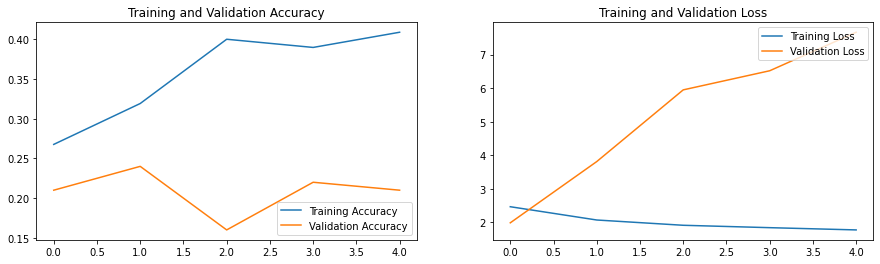

In [52]:
plot(history_conv_3dconv9_1)

In [22]:
#after updating generator by changing the normalisation technique
conv_3dconv9_2=Model3DConv_9()
conv_3dconv9_2.image_size(image_height=160,image_width=160)
conv_3dconv9_2.other_parameters(num_images=18,epochs=5,batch_size=20)
conv_3dconv9_2_model=conv_3dconv9_2.define_model(filter=(3,3,3),dense_neurons=256,dropout=0.5)
conv_3dconv9_2_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_4 (Conv3D)            (None, 18, 160, 160, 16)  1312      
_________________________________________________________________
activation_4 (Activation)    (None, 18, 160, 160, 16)  0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 18, 160, 160, 16)  64        
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 9, 80, 80, 16)     0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 9, 80, 80, 16)     0         
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 9, 80, 80, 32)     13856     
_________________________________________________________________
activation_5 (Activation)    (None, 9, 80, 80, 32)    

In [23]:
print("Total Params:", conv_3dconv9_2_model.count_params())
history_conv_3dconv9_2 = conv_3dconv9_2.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv9_2_model)

Total Params: 3638981
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 20
Epoch 1/5
34/34 [==============================] - ETA: 0s - loss: 2.5385 - categorical_accuracy: 0.2382Source path =  datasets/Project_data/val ; batch size = 20

Epoch 00001: saving model to model_init_2021-05-2507_04_42.001749/model-00001-2.53847-0.23824-1.93974-0.23000.h5
34/34 [==============================] - 103s 3s/step - loss: 2.5385 - categorical_accuracy: 0.2382 - val_loss: 1.9397 - val_categorical_accuracy: 0.2300
Epoch 2/5
34/34 [==============================] - ETA: 0s - loss: 2.0282 - categorical_accuracy: 0.3456
Epoch 00002: saving model to model_init_2021-05-2507_04_42.001749/model-00002-2.02820-0.34559-1.87908-0.28000.h5
34/34 [==============================] - 99s 3s/step - loss: 2.0282 - categorical_accuracy: 0.3456 - val_loss: 1.8791 - val_categorical_accuracy: 0.2800
Epoch 3/5
34/34 [=============================

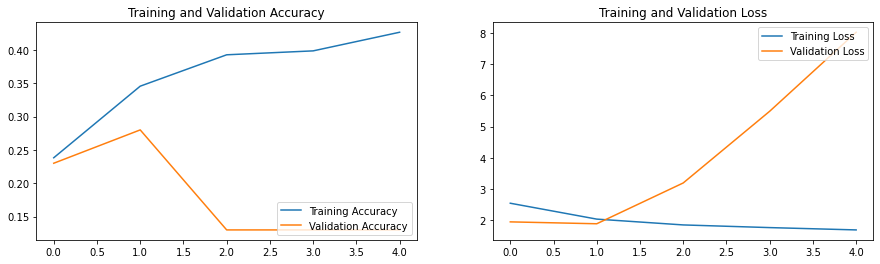

In [24]:
plot(history_conv_3dconv9_2)

In [26]:
#increasing number of images
conv_3dconv9_3=Model3DConv_9()
conv_3dconv9_3.image_size(image_height=160,image_width=160)
conv_3dconv9_3.other_parameters(num_images=30,epochs=5,batch_size=20)
conv_3dconv9_3_model=conv_3dconv9_3.define_model(filter=(3,3,3),dense_neurons=256,dropout=0.5)
conv_3dconv9_3_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_8 (Conv3D)            (None, 30, 160, 160, 16)  1312      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 160, 160, 16)  0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 30, 160, 160, 16)  64        
_________________________________________________________________
max_pooling3d_8 (MaxPooling3 (None, 15, 80, 80, 16)    0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 15, 80, 80, 16)    0         
_________________________________________________________________
conv3d_9 (Conv3D)            (None, 15, 80, 80, 32)    13856     
_________________________________________________________________
activation_9 (Activation)    (None, 15, 80, 80, 32)   

In [27]:
print("Total Params:", conv_3dconv9_3_model.count_params())
history_conv_3dconv9_3 = conv_3dconv9_3.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv9_3_model)

Total Params: 3638981
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 20
Epoch 1/5
34/34 [==============================] - ETA: 0s - loss: 2.2883 - categorical_accuracy: 0.2956Source path =  datasets/Project_data/val ; batch size = 20

Epoch 00001: saving model to model_init_2021-05-2507_15_30.996929/model-00001-2.28833-0.29559-1.71109-0.31000.h5
34/34 [==============================] - 163s 5s/step - loss: 2.2883 - categorical_accuracy: 0.2956 - val_loss: 1.7111 - val_categorical_accuracy: 0.3100
Epoch 2/5
34/34 [==============================] - ETA: 0s - loss: 1.9669 - categorical_accuracy: 0.3618
Epoch 00002: saving model to model_init_2021-05-2507_15_30.996929/model-00002-1.96690-0.36176-1.98192-0.24000.h5
34/34 [==============================] - 163s 5s/step - loss: 1.9669 - categorical_accuracy: 0.3618 - val_loss: 1.9819 - val_categorical_accuracy: 0.2400
Epoch 3/5
34/34 [============================

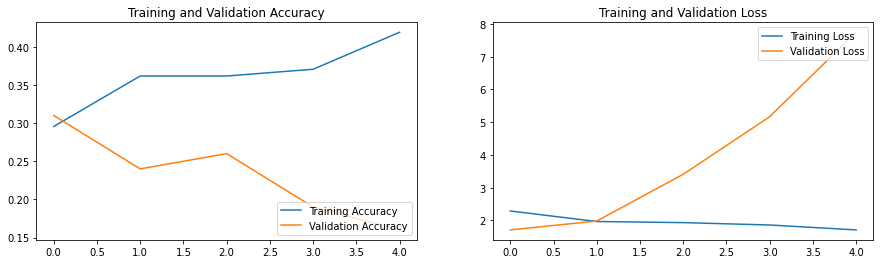

In [28]:
plot(history_conv_3dconv9_3)

In [29]:
#Removing Batch normalisation
class Model3DConv_10(ModelGenerator):

    def define_model(self,filter=(3,3,3),dense_neurons=64,dropout=0.25):

        input_shape_model = (self.num_images,self.image_width,self.image_height,3)
        
        model = Sequential()
        model.add(Conv3D(16, filter, padding='same',input_shape=input_shape_model))
        model.add(Activation('relu'))
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Dropout(dropout))
        
        model.add(Conv3D(32, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Dropout(dropout))
        
        model.add(Conv3D(64, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Dropout(dropout))
        
        model.add(Conv3D(128, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Dropout(dropout))
        
        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(5,activation='softmax'))

        optimiser = 'adam'
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        K.set_value(model.optimizer.learning_rate,0.0002)

        return model

In [33]:
conv_3dconv10_1=Model3DConv_10()
conv_3dconv10_1.image_size(image_height=160,image_width=160)
conv_3dconv10_1.other_parameters(num_images=18,epochs=5,batch_size=20)
conv_3dconv10_1_model=conv_3dconv10_1.define_model(filter=(3,3,3),dense_neurons=256,dropout=0.2)
conv_3dconv10_1_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_16 (Conv3D)           (None, 18, 160, 160, 16)  1312      
_________________________________________________________________
activation_16 (Activation)   (None, 18, 160, 160, 16)  0         
_________________________________________________________________
max_pooling3d_16 (MaxPooling (None, 9, 80, 80, 16)     0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 9, 80, 80, 16)     0         
_________________________________________________________________
conv3d_17 (Conv3D)           (None, 9, 80, 80, 32)     13856     
_________________________________________________________________
activation_17 (Activation)   (None, 9, 80, 80, 32)     0         
_________________________________________________________________
max_pooling3d_17 (MaxPooling (None, 4, 40, 40, 32)    

In [34]:
print("Total Params:", conv_3dconv10_1_model.count_params())
history_conv_3dconv10_1 = conv_3dconv10_1.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv10_1_model)

Total Params: 3638021
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 20
Epoch 1/5
34/34 [==============================] - ETA: 0s - loss: 1.9421 - categorical_accuracy: 0.3088Source path =  datasets/Project_data/val ; batch size = 20

Epoch 00001: saving model to model_init_2021-05-2507_45_49.367448/model-00001-1.94212-0.30882-1.70102-0.18000.h5
34/34 [==============================] - 97s 3s/step - loss: 1.9421 - categorical_accuracy: 0.3088 - val_loss: 1.7010 - val_categorical_accuracy: 0.1800
Epoch 2/5
34/34 [==============================] - ETA: 0s - loss: 1.5483 - categorical_accuracy: 0.4176
Epoch 00002: saving model to model_init_2021-05-2507_45_49.367448/model-00002-1.54835-0.41765-1.44044-0.34000.h5
34/34 [==============================] - 97s 3s/step - loss: 1.5483 - categorical_accuracy: 0.4176 - val_loss: 1.4404 - val_categorical_accuracy: 0.3400
Epoch 3/5
34/34 [==============================

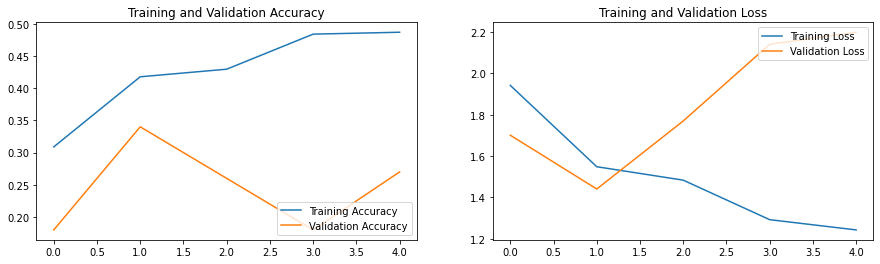

In [35]:
plot(history_conv_3dconv10_1)

In [36]:
#Updating epochs
conv_3dconv10_2=Model3DConv_10()
conv_3dconv10_2.image_size(image_height=160,image_width=160)
conv_3dconv10_2.other_parameters(num_images=18,epochs=15,batch_size=20)
conv_3dconv10_2_model=conv_3dconv10_2.define_model(filter=(3,3,3),dense_neurons=256,dropout=0.2)
conv_3dconv10_2_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_20 (Conv3D)           (None, 18, 160, 160, 16)  1312      
_________________________________________________________________
activation_20 (Activation)   (None, 18, 160, 160, 16)  0         
_________________________________________________________________
max_pooling3d_20 (MaxPooling (None, 9, 80, 80, 16)     0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 9, 80, 80, 16)     0         
_________________________________________________________________
conv3d_21 (Conv3D)           (None, 9, 80, 80, 32)     13856     
_________________________________________________________________
activation_21 (Activation)   (None, 9, 80, 80, 32)     0         
_________________________________________________________________
max_pooling3d_21 (MaxPooling (None, 4, 40, 40, 32)    

In [37]:
print("Total Params:", conv_3dconv10_2_model.count_params())
history_conv_3dconv10_2 = conv_3dconv10_2.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv10_2_model)

Total Params: 3638021
# training sequences = 663
# validation sequences = 100
# epochs = 15
Source path =  datasets/Project_data/train ; batch size = 20
Epoch 1/15
34/34 [==============================] - ETA: 0s - loss: 1.8885 - categorical_accuracy: 0.3368Source path =  datasets/Project_data/val ; batch size = 20

Epoch 00001: saving model to model_init_2021-05-2507_56_33.960519/model-00001-1.88855-0.33676-1.56940-0.21000.h5
34/34 [==============================] - 102s 3s/step - loss: 1.8885 - categorical_accuracy: 0.3368 - val_loss: 1.5694 - val_categorical_accuracy: 0.2100
Epoch 2/15
34/34 [==============================] - ETA: 0s - loss: 1.4644 - categorical_accuracy: 0.4603
Epoch 00002: saving model to model_init_2021-05-2507_56_33.960519/model-00002-1.46436-0.46029-1.49466-0.44000.h5
34/34 [==============================] - 101s 3s/step - loss: 1.4644 - categorical_accuracy: 0.4603 - val_loss: 1.4947 - val_categorical_accuracy: 0.4400
Epoch 3/15
34/34 [========================

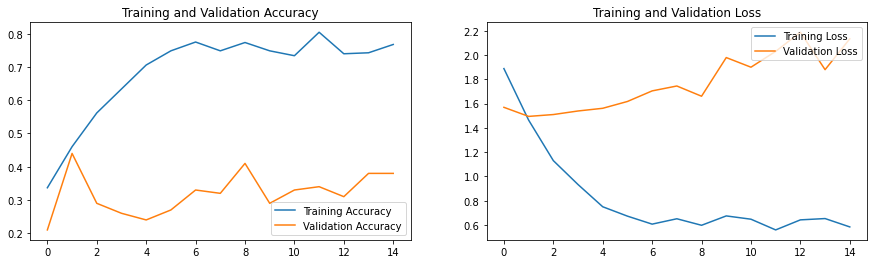

In [38]:
plot(history_conv_3dconv10_2)

In [39]:
#Using model 9 with changed parameters
conv_3dconv9_3=Model3DConv_9()
conv_3dconv9_3.image_size(image_height=100,image_width=100)
conv_3dconv9_3.other_parameters(num_images=18,epochs=15,batch_size=20)
conv_3dconv9_3_model=conv_3dconv9_3.define_model(filter=(3,3,3),dense_neurons=256,dropout=0.2)
conv_3dconv9_3_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_24 (Conv3D)           (None, 18, 100, 100, 16)  1312      
_________________________________________________________________
activation_24 (Activation)   (None, 18, 100, 100, 16)  0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 18, 100, 100, 16)  64        
_________________________________________________________________
max_pooling3d_24 (MaxPooling (None, 9, 50, 50, 16)     0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 9, 50, 50, 16)     0         
_________________________________________________________________
conv3d_25 (Conv3D)           (None, 9, 50, 50, 32)     13856     
_________________________________________________________________
activation_25 (Activation)   (None, 9, 50, 50, 32)    

In [40]:
print("Total Params:", conv_3dconv9_3_model.count_params())
history_conv_3dconv9_3 = conv_3dconv9_3.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv9_3_model)

Total Params: 1541829
# training sequences = 663
# validation sequences = 100
# epochs = 15
Source path =  datasets/Project_data/train ; batch size = 20
Epoch 1/15
34/34 [==============================] - ETA: 0s - loss: 1.8521 - categorical_accuracy: 0.3279Source path =  datasets/Project_data/val ; batch size = 20

Epoch 00001: saving model to model_init_2021-05-2508_22_19.171436/model-00001-1.85210-0.32794-3.04118-0.23000.h5
34/34 [==============================] - 90s 3s/step - loss: 1.8521 - categorical_accuracy: 0.3279 - val_loss: 3.0412 - val_categorical_accuracy: 0.2300
Epoch 2/15
34/34 [==============================] - ETA: 0s - loss: 1.3715 - categorical_accuracy: 0.4676
Epoch 00002: saving model to model_init_2021-05-2508_22_19.171436/model-00002-1.37153-0.46765-1.57511-0.44000.h5
34/34 [==============================] - 90s 3s/step - loss: 1.3715 - categorical_accuracy: 0.4676 - val_loss: 1.5751 - val_categorical_accuracy: 0.4400
Epoch 3/15
34/34 [==========================

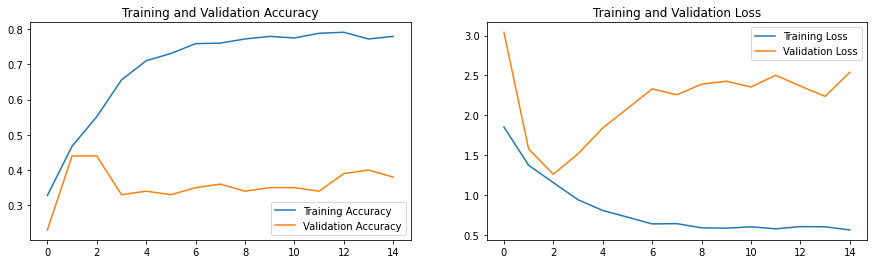

In [41]:
plot(history_conv_3dconv9_3)

In [42]:
#Using model 9 with reduced image size
conv_3dconv9_4=Model3DConv_9()
conv_3dconv9_4.image_size(image_height=100,image_width=100)
conv_3dconv9_4.other_parameters(num_images=18,epochs=15,batch_size=20)
conv_3dconv9_4_model=conv_3dconv9_4.define_model(filter=(3,3,3),dense_neurons=256,dropout=0.5)
conv_3dconv9_4_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_28 (Conv3D)           (None, 18, 100, 100, 16)  1312      
_________________________________________________________________
activation_28 (Activation)   (None, 18, 100, 100, 16)  0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 18, 100, 100, 16)  64        
_________________________________________________________________
max_pooling3d_28 (MaxPooling (None, 9, 50, 50, 16)     0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 9, 50, 50, 16)     0         
_________________________________________________________________
conv3d_29 (Conv3D)           (None, 9, 50, 50, 32)     13856     
_________________________________________________________________
activation_29 (Activation)   (None, 9, 50, 50, 32)    

In [43]:
print("Total Params:", conv_3dconv9_4_model.count_params())
history_conv_3dconv9_4 = conv_3dconv9_4.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv9_4_model)

Total Params: 1541829
# training sequences = 663
# validation sequences = 100
# epochs = 15
Source path =  datasets/Project_data/train ; batch size = 20
Epoch 1/15
34/34 [==============================] - ETA: 0s - loss: 2.4503 - categorical_accuracy: 0.2676Source path =  datasets/Project_data/val ; batch size = 20

Epoch 00001: saving model to model_init_2021-05-2508_49_54.673635/model-00001-2.45027-0.26765-1.87010-0.23000.h5
34/34 [==============================] - 91s 3s/step - loss: 2.4503 - categorical_accuracy: 0.2676 - val_loss: 1.8701 - val_categorical_accuracy: 0.2300
Epoch 2/15
34/34 [==============================] - ETA: 0s - loss: 2.2215 - categorical_accuracy: 0.3147
Epoch 00002: saving model to model_init_2021-05-2508_49_54.673635/model-00002-2.22152-0.31471-1.35928-0.44000.h5
34/34 [==============================] - 92s 3s/step - loss: 2.2215 - categorical_accuracy: 0.3147 - val_loss: 1.3593 - val_categorical_accuracy: 0.4400
Epoch 3/15
34/34 [==========================

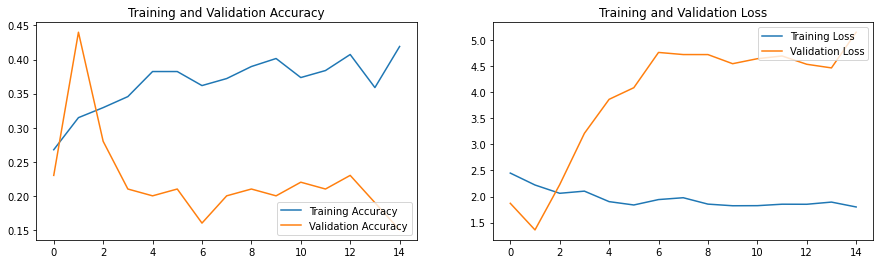

In [44]:
plot(history_conv_3dconv9_4)

In [45]:
#Using model 9 with low dropout and high epoch value
conv_3dconv9_5=Model3DConv_9()
conv_3dconv9_5.image_size(image_height=100,image_width=100)
conv_3dconv9_5.other_parameters(num_images=18,epochs=30,batch_size=20)
conv_3dconv9_5_model=conv_3dconv9_5.define_model(filter=(3,3,3),dense_neurons=256,dropout=0.2)
conv_3dconv9_5_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_32 (Conv3D)           (None, 18, 100, 100, 16)  1312      
_________________________________________________________________
activation_32 (Activation)   (None, 18, 100, 100, 16)  0         
_________________________________________________________________
batch_normalization_36 (Batc (None, 18, 100, 100, 16)  64        
_________________________________________________________________
max_pooling3d_32 (MaxPooling (None, 9, 50, 50, 16)     0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 9, 50, 50, 16)     0         
_________________________________________________________________
conv3d_33 (Conv3D)           (None, 9, 50, 50, 32)     13856     
_________________________________________________________________
activation_33 (Activation)   (None, 9, 50, 50, 32)    

In [46]:
print("Total Params:", conv_3dconv9_5_model.count_params())
history_conv_3dconv9_5 = conv_3dconv9_5.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv9_5_model)

Total Params: 1541829
# training sequences = 663
# validation sequences = 100
# epochs = 30
Source path =  datasets/Project_data/train ; batch size = 20
Epoch 1/30
34/34 [==============================] - ETA: 0s - loss: 1.8891 - categorical_accuracy: 0.3206Source path =  datasets/Project_data/val ; batch size = 20

Epoch 00001: saving model to model_init_2021-05-2509_12_34.395659/model-00001-1.88914-0.32059-2.34142-0.24000.h5
34/34 [==============================] - 90s 3s/step - loss: 1.8891 - categorical_accuracy: 0.3206 - val_loss: 2.3414 - val_categorical_accuracy: 0.2400
Epoch 2/30
34/34 [==============================] - ETA: 0s - loss: 1.5522 - categorical_accuracy: 0.4353
Epoch 00002: saving model to model_init_2021-05-2509_12_34.395659/model-00002-1.55223-0.43529-1.36619-0.46000.h5
34/34 [==============================] - 89s 3s/step - loss: 1.5522 - categorical_accuracy: 0.4353 - val_loss: 1.3662 - val_categorical_accuracy: 0.4600
Epoch 3/30
34/34 [==========================

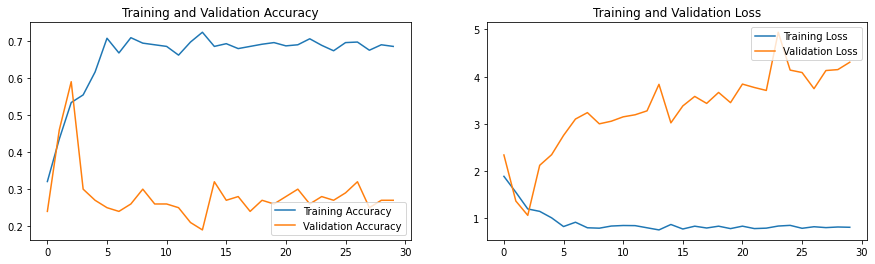

In [48]:
plot(history_conv_3dconv9_5)

In [50]:
#Updating optimizer to rmsprop im Model9
class Model3DConv_11(ModelGenerator):

    def define_model(self,filter=(3,3,3),dense_neurons=64,dropout=0.25):

        input_shape_model = (self.num_images,self.image_width,self.image_height,3)
        
        model = Sequential()
        model.add(Conv3D(16, filter, padding='same',input_shape=input_shape_model))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Dropout(dropout))
        
        model.add(Conv3D(32, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Dropout(dropout))
        
        model.add(Conv3D(64, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Dropout(dropout))
        
        model.add(Conv3D(128, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Dropout(dropout))
        
        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(5,activation='softmax'))

        optimiser = 'rmsprop'
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        K.set_value(model.optimizer.learning_rate,0.0002)

        return model

In [51]:
#Using model 9 with low dropout and high epoch value
conv_3dconv11_1=Model3DConv_11()
conv_3dconv11_1.image_size(image_height=100,image_width=100)
conv_3dconv11_1.other_parameters(num_images=18,epochs=5,batch_size=20)
conv_3dconv11_1_model=conv_3dconv11_1.define_model(filter=(3,3,3),dense_neurons=256,dropout=0.2)
conv_3dconv11_1_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_36 (Conv3D)           (None, 18, 100, 100, 16)  1312      
_________________________________________________________________
activation_36 (Activation)   (None, 18, 100, 100, 16)  0         
_________________________________________________________________
batch_normalization_42 (Batc (None, 18, 100, 100, 16)  64        
_________________________________________________________________
max_pooling3d_36 (MaxPooling (None, 9, 50, 50, 16)     0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 9, 50, 50, 16)     0         
_________________________________________________________________
conv3d_37 (Conv3D)           (None, 9, 50, 50, 32)     13856     
_________________________________________________________________
activation_37 (Activation)   (None, 9, 50, 50, 32)    

In [52]:
print("Total Params:", conv_3dconv11_1_model.count_params())
history_conv_3dconv11_1 = conv_3dconv11_1.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv11_1_model)

Total Params: 1541829
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 20
Epoch 1/5
34/34 [==============================] - ETA: 0s - loss: 1.7758 - categorical_accuracy: 0.3603Source path =  datasets/Project_data/val ; batch size = 20

Epoch 00001: saving model to model_init_2021-05-2509_59_59.603713/model-00001-1.77582-0.36029-2.20862-0.21000.h5
34/34 [==============================] - 87s 3s/step - loss: 1.7758 - categorical_accuracy: 0.3603 - val_loss: 2.2086 - val_categorical_accuracy: 0.2100
Epoch 2/5
34/34 [==============================] - ETA: 0s - loss: 1.3718 - categorical_accuracy: 0.5162
Epoch 00002: saving model to model_init_2021-05-2509_59_59.603713/model-00002-1.37176-0.51618-3.34204-0.23000.h5
34/34 [==============================] - 85s 2s/step - loss: 1.3718 - categorical_accuracy: 0.5162 - val_loss: 3.3420 - val_categorical_accuracy: 0.2300
Epoch 3/5
34/34 [==============================

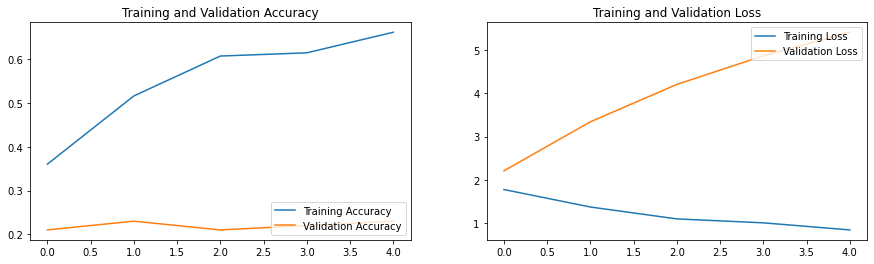

In [53]:
plot(history_conv_3dconv11_1)

In [34]:
#Adding dropout in model4 as it had highest train accuracy
class Model3DConv_12(ModelGenerator):

    def define_model(self,filter=(3,3,3),dense_neurons=64,dropout=0.25):

        input_shape_model = (self.num_images,self.image_width,self.image_height,3)
        
        model = Sequential()
        model.add(Conv3D(16, filter, padding='same',input_shape=input_shape_model))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(32, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(Conv3D(32, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))

        model.add(Conv3D(64, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(Conv3D(64, filter, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        
        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(dense_neurons,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(5,activation='softmax'))

        optimiser = 'adam'
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        K.set_value(model.optimizer.learning_rate,0.0002)

        return model

In [36]:
conv_3dconv12_1=Model3DConv_12()
conv_3dconv12_1.image_size(image_height=100,image_width=100)
conv_3dconv12_1.other_parameters(num_images=15,epochs=5,batch_size=20)
conv_3dconv12_1_model=conv_3dconv12_1.define_model(filter=(3,3,3),dense_neurons=256,dropout=0.5)
conv_3dconv12_1_model.summary()  

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_30 (Conv3D)           (None, 15, 100, 100, 16)  1312      
_________________________________________________________________
activation_30 (Activation)   (None, 15, 100, 100, 16)  0         
_________________________________________________________________
batch_normalization_42 (Batc (None, 15, 100, 100, 16)  64        
_________________________________________________________________
max_pooling3d_18 (MaxPooling (None, 7, 50, 50, 16)     0         
_________________________________________________________________
conv3d_31 (Conv3D)           (None, 7, 50, 50, 32)     13856     
_________________________________________________________________
activation_31 (Activation)   (None, 7, 50, 50, 32)     0         
_________________________________________________________________
batch_normalization_43 (Batc (None, 7, 50, 50, 32)    

In [37]:
print("Total Params:", conv_3dconv12_1_model.count_params())
history_conv_3dconv12_1 = conv_3dconv12_1.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv12_1_model)

Total Params: 2638373
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 39
Epoch 1/5
17/17 [==============================] - ETA: 0s - loss: 2.1457 - categorical_accuracy: 0.3333Source path =  datasets/Project_data/val ; batch size = 39

Epoch 00001: saving model to model_init_2021-05-2513_05_55.821237/model-00001-2.14567-0.33333-1.76263-0.23077.h5
17/17 [==============================] - 72s 4s/step - loss: 2.1457 - categorical_accuracy: 0.3333 - val_loss: 1.7626 - val_categorical_accuracy: 0.2308
Epoch 2/5
17/17 [==============================] - ETA: 0s - loss: 1.4002 - categorical_accuracy: 0.5053
Epoch 00002: saving model to model_init_2021-05-2513_05_55.821237/model-00002-1.40020-0.50528-2.29634-0.18803.h5
17/17 [==============================] - 71s 4s/step - loss: 1.4002 - categorical_accuracy: 0.5053 - val_loss: 2.2963 - val_categorical_accuracy: 0.1880
Epoch 3/5
17/17 [==============================

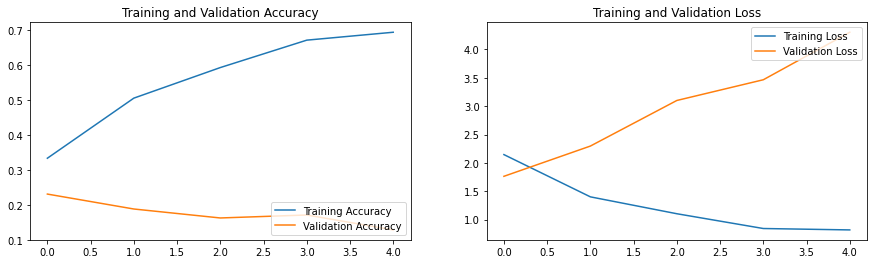

In [38]:
plot(history_conv_3dconv12_1)

In [16]:
#Adding dropout to Model 8
class Model3DConv_13(ModelGenerator):

    def define_model(self,filter=(3,3,3),dense_neurons=64,dropout=0.25):

        input_shape_model = (self.num_images,self.image_width,self.image_height,3)
        
        model = Sequential()
        model.add(Conv3D(16, filter, padding='same',input_shape=input_shape_model,activity_regularizer=l1(0.001)))
        model.add(Activation('elu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        
        model.add(Conv3D(32, filter, padding='same',activity_regularizer=l1(0.001)))
        model.add(Activation('elu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        
        model.add(Conv3D(64, filter, padding='same',activity_regularizer=l1(0.001)))
        model.add(Activation('elu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        
        model.add(Conv3D(128, filter, padding='same',activity_regularizer=l1(0.001)))
        model.add(Activation('elu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        
        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='elu',activity_regularizer=l1(0.001)))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(dense_neurons,activation='elu',activity_regularizer=l1(0.001)))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(5,activation='softmax'))

        optimiser = 'rmsprop'
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        K.set_value(model.optimizer.learning_rate,0.0002)

        return model

In [17]:
from tensorflow.keras.regularizers import l1
#Using model 9 with changed parameters
conv_3dconv13_1=Model3DConv_13()
conv_3dconv13_1.image_size(image_height=100,image_width=100)
conv_3dconv13_1.other_parameters(num_images=16,epochs=5,batch_size=20)
conv_3dconv13_1_model=conv_3dconv13_1.define_model(filter=(3,3,3),dense_neurons=256,dropout=0.5)
conv_3dconv13_1_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 16, 100, 100, 16)  1312      
_________________________________________________________________
activation (Activation)      (None, 16, 100, 100, 16)  0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 100, 100, 16)  64        
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 8, 50, 50, 16)     0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 8, 50, 50, 32)     13856     
_________________________________________________________________
activation_1 (Activation)    (None, 8, 50, 50, 32)     0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 50, 50, 32)     1

In [18]:
print("Total Params:", conv_3dconv13_1_model.count_params())
history_conv_3dconv13_1 = conv_3dconv13_1.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv13_1_model)

Total Params: 1541829
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 20
Epoch 1/5
34/34 [==============================] - ETA: 0s - loss: 537.1850 - categorical_accuracy: 0.3680Source path =  datasets/Project_data/val ; batch size = 20

Epoch 00001: saving model to model_init_2021-05-3105_56_36.910847/model-00001-537.18500-0.36802-167.99391-0.21000.h5
34/34 [==============================] - 82s 2s/step - loss: 537.1850 - categorical_accuracy: 0.3680 - val_loss: 167.9939 - val_categorical_accuracy: 0.2100
Epoch 2/5
34/34 [==============================] - ETA: 0s - loss: 323.5131 - categorical_accuracy: 0.4917
Epoch 00002: saving model to model_init_2021-05-3105_56_36.910847/model-00002-323.51309-0.49170-122.33318-0.19000.h5
34/34 [==============================] - 83s 2s/step - loss: 323.5131 - categorical_accuracy: 0.4917 - val_loss: 122.3332 - val_categorical_accuracy: 0.1900
Epoch 3/5
34/34 [==========

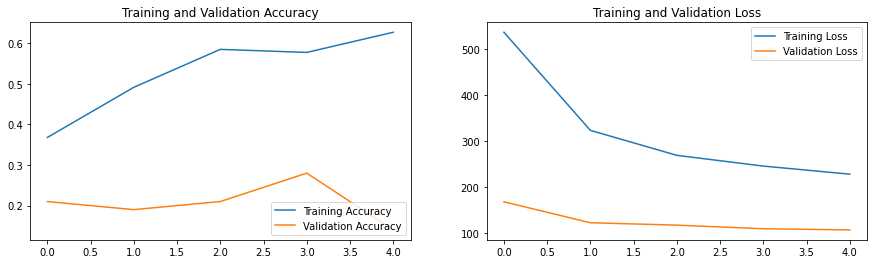

In [19]:
plot(history_conv_3dconv13_1)

In [ ]:
#Adding dropout to Model 8
class Model3DConv_14(ModelGenerator):

    def define_model(self,filter=(3,3,3),dense_neurons=64,dropout=0.25):

        input_shape_model = (self.num_images,self.image_width,self.image_height,3)
        
        model = Sequential()
        
        model.add(Conv3D(32, filter, padding='same',input_shape=input_shape_model))
        model.add(Activation('elu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Dropout(dropout))
        
        model.add(Conv3D(64, filter, padding='same'))
        model.add(Activation('elu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Dropout(dropout))
        
        model.add(Conv3D(128, filter, padding='same'))
        model.add(Activation('elu'))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Dropout(dropout))
        
        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='elu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

        model.add(Dense(5,activation='softmax'))

        optimiser = 'rmsprop'
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        #K.set_value(model.optimizer.learning_rate,0.0002)

        return model

In [48]:
from tensorflow.keras.regularizers import l1,l2
#Using model 9 with changed parameters
conv_3dconv14_1=Model3DConv_14()
conv_3dconv14_1.image_size(image_height=100,image_width=100)
conv_3dconv14_1.other_parameters(num_images=18,epochs=30,batch_size=30)
conv_3dconv14_1_model=conv_3dconv14_1.define_model(filter=(3,3,3),dense_neurons=512,dropout=0.5)
conv_3dconv14_1_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_22 (Conv3D)           (None, 18, 100, 100, 32)  2624      
_________________________________________________________________
activation_22 (Activation)   (None, 18, 100, 100, 32)  0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 18, 100, 100, 32)  128       
_________________________________________________________________
max_pooling3d_22 (MaxPooling (None, 9, 50, 50, 32)     0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 9, 50, 50, 32)     0         
_________________________________________________________________
conv3d_23 (Conv3D)           (None, 9, 50, 50, 64)     55360     
_________________________________________________________________
activation_23 (Activation)   (None, 9, 50, 50, 64)    

In [49]:
print("Total Params:", conv_3dconv14_1_model.count_params())
history_conv_3dconv14_1 = conv_3dconv14_1.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv14_1_model)

Total Params: 19159685
# training sequences = 663
# validation sequences = 100
# epochs = 30
Source path =  datasets/Project_data/train ; batch size = 30
Epoch 1/30
23/23 [==============================] - ETA: 0s - loss: 12.2003 - categorical_accuracy: 0.4725Source path =  datasets/Project_data/val ; batch size = 30

Epoch 00001: saving model to model_init_2021-05-2608_49_33.748825/model-00001-12.20026-0.47246-23.55349-0.15833.h5
23/23 [==============================] - 77s 3s/step - loss: 12.2003 - categorical_accuracy: 0.4725 - val_loss: 23.5535 - val_categorical_accuracy: 0.1583
Epoch 2/30
23/23 [==============================] - ETA: 0s - loss: 8.3055 - categorical_accuracy: 0.6580
Epoch 00002: saving model to model_init_2021-05-2608_49_33.748825/model-00002-8.30554-0.65797-26.53703-0.15833.h5
23/23 [==============================] - 78s 3s/step - loss: 8.3055 - categorical_accuracy: 0.6580 - val_loss: 26.5370 - val_categorical_accuracy: 0.1583
Epoch 3/30
23/23 [==================

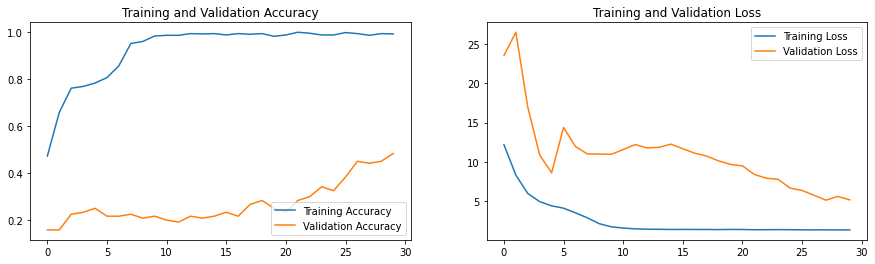

In [50]:
plot(history_conv_3dconv14_1)

In [56]:
from tensorflow.keras.regularizers import l1,l2
#Using model 9 with changed parameters
#with new generator with new cropping logic
conv_3dconv14_2=Model3DConv_14()
conv_3dconv14_2.image_size(image_height=100,image_width=100)
conv_3dconv14_2.other_parameters(num_images=18,epochs=5,batch_size=30)
conv_3dconv14_2_model=conv_3dconv14_2.define_model(filter=(3,3,3),dense_neurons=512,dropout=0.5)
conv_3dconv14_2_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_29 (Conv3D)           (None, 18, 100, 100, 32)  2624      
_________________________________________________________________
activation_29 (Activation)   (None, 18, 100, 100, 32)  0         
_________________________________________________________________
batch_normalization_43 (Batc (None, 18, 100, 100, 32)  128       
_________________________________________________________________
max_pooling3d_29 (MaxPooling (None, 9, 50, 50, 32)     0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 9, 50, 50, 32)     0         
_________________________________________________________________
conv3d_30 (Conv3D)           (None, 9, 50, 50, 64)     55360     
_________________________________________________________________
activation_30 (Activation)   (None, 9, 50, 50, 64)    

In [57]:
print("Total Params:", conv_3dconv14_2_model.count_params())
history_conv_3dconv14_2 = conv_3dconv14_2.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv14_2_model)

Total Params: 19159685
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 30
Epoch 1/5
23/23 [==============================] - ETA: 0s - loss: 12.7288 - categorical_accuracy: 0.4580Source path =  datasets/Project_data/val ; batch size = 30

Epoch 00001: saving model to model_init_2021-05-2609_44_51.016344/model-00001-12.72878-0.45797-20.58344-0.21667.h5
23/23 [==============================] - 80s 3s/step - loss: 12.7288 - categorical_accuracy: 0.4580 - val_loss: 20.5834 - val_categorical_accuracy: 0.2167
Epoch 2/5
23/23 [==============================] - ETA: 0s - loss: 9.0317 - categorical_accuracy: 0.6667
Epoch 00002: saving model to model_init_2021-05-2609_44_51.016344/model-00002-9.03171-0.66667-27.13683-0.21667.h5
23/23 [==============================] - 78s 3s/step - loss: 9.0317 - categorical_accuracy: 0.6667 - val_loss: 27.1368 - val_categorical_accuracy: 0.2167
Epoch 3/5
23/23 [======================

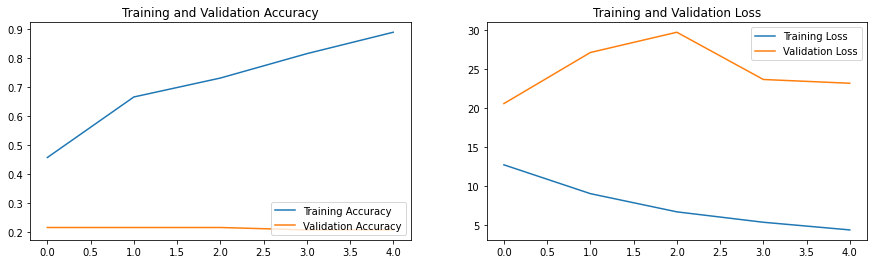

In [58]:
plot(history_conv_3dconv14_2)

## After performing intensive search and hyperparameter tuning we are not able to generate a model giving good validation accuracy. Even after using 15+ million parameters we are not getting a good model. Trying out an approach of using a simple model.

In [26]:
#Trying very simple model
class Model3DConv_15(ModelGenerator):

    def define_model(self,filter=(3,3,3),dense_neurons=64,dropout=0.25):

        input_shape_model = (self.num_images,self.image_width,self.image_height,3)
        
        model = Sequential()
        
        model.add(Conv3D(16, filter,input_shape=input_shape_model))
        model.add(Activation('relu'))
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        
        model.add(Conv3D(32, filter))
        model.add(Activation('relu'))
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        
        
        model.add(Conv3D(64, filter))
        model.add(Activation('relu'))
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        
        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='relu'))
       

        model.add(Dense(5,activation='softmax'))

        optimiser = 'adam'
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        #K.set_value(model.optimizer.learning_rate,0.0002)

        return model

In [27]:
conv_3dconv15_1=Model3DConv_15()
conv_3dconv15_1.image_size(image_height=150,image_width=150)
conv_3dconv15_1.other_parameters(num_images=30,epochs=5,batch_size=16)
conv_3dconv15_1_model=conv_3dconv15_1.define_model(filter=(3,3,3),dense_neurons=128)
conv_3dconv15_1_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_12 (Conv3D)           (None, 28, 148, 148, 16)  1312      
_________________________________________________________________
activation_12 (Activation)   (None, 28, 148, 148, 16)  0         
_________________________________________________________________
max_pooling3d_12 (MaxPooling (None, 14, 74, 74, 16)    0         
_________________________________________________________________
conv3d_13 (Conv3D)           (None, 12, 72, 72, 32)    13856     
_________________________________________________________________
activation_13 (Activation)   (None, 12, 72, 72, 32)    0         
_________________________________________________________________
max_pooling3d_13 (MaxPooling (None, 6, 36, 36, 32)     0         
_________________________________________________________________
conv3d_14 (Conv3D)           (None, 4, 34, 34, 64)    

In [28]:
print("Total Params:", conv_3dconv15_1_model.count_params())
history_conv_3dconv15_1 = conv_3dconv15_1.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv15_1_model)

Total Params: 4806277
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 16
Epoch 1/5
42/42 [==============================] - ETA: 0s - loss: 1.4600 - categorical_accuracy: 0.3002Source path =  datasets/Project_data/val ; batch size = 16

Epoch 00001: saving model to model_init_2021-05-2611_18_52.228946/model-00001-1.46004-0.30015-1.21368-0.43000.h5
42/42 [==============================] - 159s 4s/step - loss: 1.4600 - categorical_accuracy: 0.3002 - val_loss: 1.2137 - val_categorical_accuracy: 0.4300
Epoch 2/5
42/42 [==============================] - ETA: 0s - loss: 1.0362 - categorical_accuracy: 0.5943
Epoch 00002: saving model to model_init_2021-05-2611_18_52.228946/model-00002-1.03617-0.59427-0.95666-0.65000.h5
42/42 [==============================] - 158s 4s/step - loss: 1.0362 - categorical_accuracy: 0.5943 - val_loss: 0.9567 - val_categorical_accuracy: 0.6500
Epoch 3/5
42/42 [============================

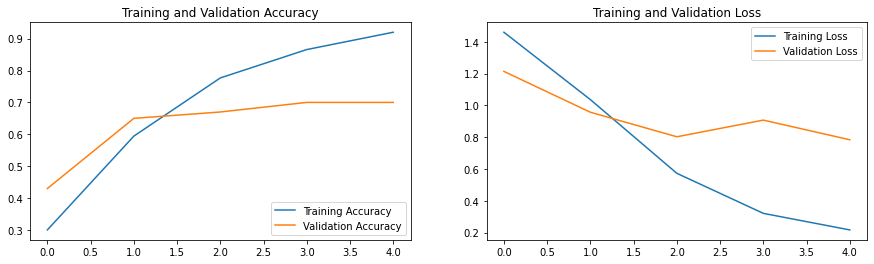

In [29]:
plot(history_conv_3dconv15_1)

In [30]:
conv_3dconv15_2=Model3DConv_15()
conv_3dconv15_2.image_size(image_height=150,image_width=150)
conv_3dconv15_2.other_parameters(num_images=30,epochs=15,batch_size=16)
conv_3dconv15_2_model=conv_3dconv15_2.define_model(filter=(3,3,3),dense_neurons=128)
conv_3dconv15_2_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_15 (Conv3D)           (None, 28, 148, 148, 16)  1312      
_________________________________________________________________
activation_15 (Activation)   (None, 28, 148, 148, 16)  0         
_________________________________________________________________
max_pooling3d_15 (MaxPooling (None, 14, 74, 74, 16)    0         
_________________________________________________________________
conv3d_16 (Conv3D)           (None, 12, 72, 72, 32)    13856     
_________________________________________________________________
activation_16 (Activation)   (None, 12, 72, 72, 32)    0         
_________________________________________________________________
max_pooling3d_16 (MaxPooling (None, 6, 36, 36, 32)     0         
_________________________________________________________________
conv3d_17 (Conv3D)           (None, 4, 34, 34, 64)    

In [31]:
print("Total Params:", conv_3dconv15_2_model.count_params())
history_conv_3dconv15_2 = conv_3dconv15_2.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv15_2_model)

Total Params: 4806277
# training sequences = 663
# validation sequences = 100
# epochs = 15
Source path =  datasets/Project_data/train ; batch size = 16
Epoch 1/15
42/42 [==============================] - ETA: 0s - loss: 1.7225 - categorical_accuracy: 0.2836Source path =  datasets/Project_data/val ; batch size = 16

Epoch 00001: saving model to model_init_2021-05-2611_33_24.072906/model-00001-1.72251-0.28356-1.29585-0.42000.h5
42/42 [==============================] - 158s 4s/step - loss: 1.7225 - categorical_accuracy: 0.2836 - val_loss: 1.2958 - val_categorical_accuracy: 0.4200
Epoch 2/15
42/42 [==============================] - ETA: 0s - loss: 1.0456 - categorical_accuracy: 0.6229
Epoch 00002: saving model to model_init_2021-05-2611_33_24.072906/model-00002-1.04564-0.62293-0.93772-0.57000.h5
42/42 [==============================] - 156s 4s/step - loss: 1.0456 - categorical_accuracy: 0.6229 - val_loss: 0.9377 - val_categorical_accuracy: 0.5700
Epoch 3/15
42/42 [========================

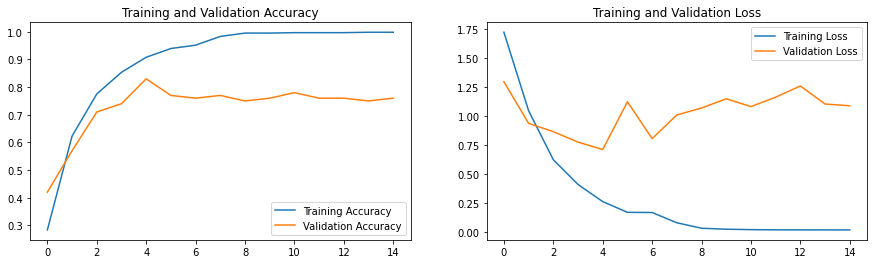

In [32]:
plot(history_conv_3dconv15_2)

## Best Performing Model Architecture - Model3DConv_16

In [42]:
#Adding dropout to Model 15
class Model3DConv_16(ModelGenerator):

    def define_model(self,filter=(3,3,3),dense_neurons=64,dropout=0.25):

        input_shape_model = (self.num_images,self.image_width,self.image_height,3)
        
        model = Sequential()
        
        model.add(Conv3D(16, filter,input_shape=input_shape_model))
        model.add(Activation('relu'))
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        
        model.add(Conv3D(32, filter))
        model.add(Activation('relu'))
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        
        
        model.add(Conv3D(64, filter))
        model.add(Activation('relu'))
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        
        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(Dropout(dropout))

        model.add(Dense(5,activation='softmax'))

        optimiser = 'adam'
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        #K.set_value(model.optimizer.learning_rate,0.0002)

        return model

In [34]:
conv_3dconv16_1=Model3DConv_16()
conv_3dconv16_1.image_size(image_height=150,image_width=150)
conv_3dconv16_1.other_parameters(num_images=30,epochs=5,batch_size=16)
conv_3dconv16_1_model=conv_3dconv16_1.define_model(filter=(3,3,3),dense_neurons=128,dropout=0.2)
conv_3dconv16_1_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_18 (Conv3D)           (None, 28, 148, 148, 16)  1312      
_________________________________________________________________
activation_18 (Activation)   (None, 28, 148, 148, 16)  0         
_________________________________________________________________
max_pooling3d_18 (MaxPooling (None, 14, 74, 74, 16)    0         
_________________________________________________________________
conv3d_19 (Conv3D)           (None, 12, 72, 72, 32)    13856     
_________________________________________________________________
activation_19 (Activation)   (None, 12, 72, 72, 32)    0         
_________________________________________________________________
max_pooling3d_19 (MaxPooling (None, 6, 36, 36, 32)     0         
_________________________________________________________________
conv3d_20 (Conv3D)           (None, 4, 34, 34, 64)    

In [35]:
print("Total Params:", conv_3dconv16_1_model.count_params())
history_conv_3dconv16_1 = conv_3dconv16_1.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv16_1_model)

Total Params: 4806277
# training sequences = 663
# validation sequences = 100
# epochs = 5
Source path =  datasets/Project_data/train ; batch size = 16
Epoch 1/5
42/42 [==============================] - ETA: 0s - loss: 1.7147 - categorical_accuracy: 0.2594Source path =  datasets/Project_data/val ; batch size = 16

Epoch 00001: saving model to model_init_2021-05-2612_12_42.514852/model-00001-1.71469-0.25943-1.30932-0.38000.h5
42/42 [==============================] - 158s 4s/step - loss: 1.7147 - categorical_accuracy: 0.2594 - val_loss: 1.3093 - val_categorical_accuracy: 0.3800
Epoch 2/5
42/42 [==============================] - ETA: 0s - loss: 1.2050 - categorical_accuracy: 0.4827
Epoch 00002: saving model to model_init_2021-05-2612_12_42.514852/model-00002-1.20502-0.48265-1.02311-0.60000.h5
42/42 [==============================] - 158s 4s/step - loss: 1.2050 - categorical_accuracy: 0.4827 - val_loss: 1.0231 - val_categorical_accuracy: 0.6000
Epoch 3/5
42/42 [============================

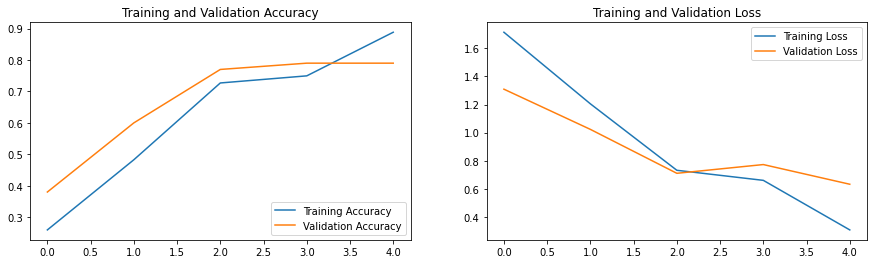

In [36]:
plot(history_conv_3dconv16_1)

In [19]:
#running for higher number of epochs with 0.2 droput value
conv_3dconv16_2=Model3DConv_16()
conv_3dconv16_2.image_size(image_height=150,image_width=150)
conv_3dconv16_2.other_parameters(num_images=30,epochs=15,batch_size=16)
conv_3dconv16_2_model=conv_3dconv16_2.define_model(filter=(3,3,3),dense_neurons=128,dropout=0.2)
conv_3dconv16_2_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_3 (Conv3D)            (None, 28, 148, 148, 16)  1312      
_________________________________________________________________
activation_3 (Activation)    (None, 28, 148, 148, 16)  0         
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 14, 74, 74, 16)    0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 12, 72, 72, 32)    13856     
_________________________________________________________________
activation_4 (Activation)    (None, 12, 72, 72, 32)    0         
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 6, 36, 36, 32)     0         
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 4, 34, 34, 64)    

In [20]:
print("Total Params:", conv_3dconv16_2_model.count_params())
history_conv_3dconv16_2 = conv_3dconv16_2.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv16_2_model)

Total Params: 4806277
# training sequences = 663
# validation sequences = 100
# epochs = 15
Source path =  datasets/Project_data/train ; batch size = 16
Epoch 1/15
42/42 [==============================] - ETA: 0s - loss: 1.5627 - categorical_accuracy: 0.3047Source path =  datasets/Project_data/val ; batch size = 16

Epoch 00001: saving model to model_init_2021-05-2614_18_00.291554/model-00001-1.56267-0.30468-1.11134-0.54000.h5
42/42 [==============================] - 160s 4s/step - loss: 1.5627 - categorical_accuracy: 0.3047 - val_loss: 1.1113 - val_categorical_accuracy: 0.5400
Epoch 2/15
42/42 [==============================] - ETA: 0s - loss: 1.0689 - categorical_accuracy: 0.5867
Epoch 00002: saving model to model_init_2021-05-2614_18_00.291554/model-00002-1.06893-0.58673-0.95329-0.70000.h5
42/42 [==============================] - 159s 4s/step - loss: 1.0689 - categorical_accuracy: 0.5867 - val_loss: 0.9533 - val_categorical_accuracy: 0.7000
Epoch 3/15
42/42 [========================

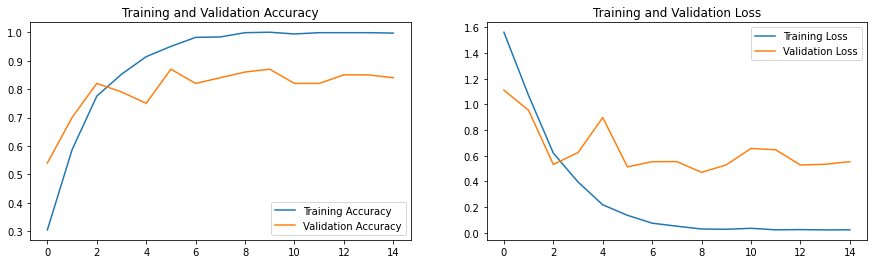

In [21]:
plot(history_conv_3dconv16_2)

## As the simple model seems promising ,will now try to regularize for better results and also try tuning using various parameters.

In [16]:
#running for higher number of epochs with 0.3 droput value
conv_3dconv16_3=Model3DConv_16()
conv_3dconv16_3.image_size(image_height=150,image_width=150)
conv_3dconv16_3.other_parameters(num_images=30,epochs=15,batch_size=16)
conv_3dconv16_3_model=conv_3dconv16_3.define_model(filter=(3,3,3),dense_neurons=128,dropout=0.3)
conv_3dconv16_3_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 28, 148, 148, 16)  1312      
_________________________________________________________________
activation (Activation)      (None, 28, 148, 148, 16)  0         
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 14, 74, 74, 16)    0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 12, 72, 72, 32)    13856     
_________________________________________________________________
activation_1 (Activation)    (None, 12, 72, 72, 32)    0         
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 6, 36, 36, 32)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 4, 34, 34, 64)     5

In [17]:
print("Total Params:", conv_3dconv16_3_model.count_params())
history_conv_3dconv16_3 = conv_3dconv16_3.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv16_3_model)

Total Params: 4806277
# training sequences = 663
# validation sequences = 100
# epochs = 15
Source path =  datasets/Project_data/train ; batch size = 16
Epoch 1/15
42/42 [==============================] - ETA: 0s - loss: 1.5197 - categorical_accuracy: 0.2851Source path =  datasets/Project_data/val ; batch size = 16

Epoch 00001: saving model to model_init_2021-05-2613_38_09.875917/model-00001-1.51974-0.28507-1.14556-0.57000.h5
42/42 [==============================] - 160s 4s/step - loss: 1.5197 - categorical_accuracy: 0.2851 - val_loss: 1.1456 - val_categorical_accuracy: 0.5700
Epoch 2/15
42/42 [==============================] - ETA: 0s - loss: 1.0407 - categorical_accuracy: 0.6154
Epoch 00002: saving model to model_init_2021-05-2613_38_09.875917/model-00002-1.04072-0.61538-1.05315-0.64000.h5
42/42 [==============================] - 162s 4s/step - loss: 1.0407 - categorical_accuracy: 0.6154 - val_loss: 1.0532 - val_categorical_accuracy: 0.6400
Epoch 3/15
42/42 [========================

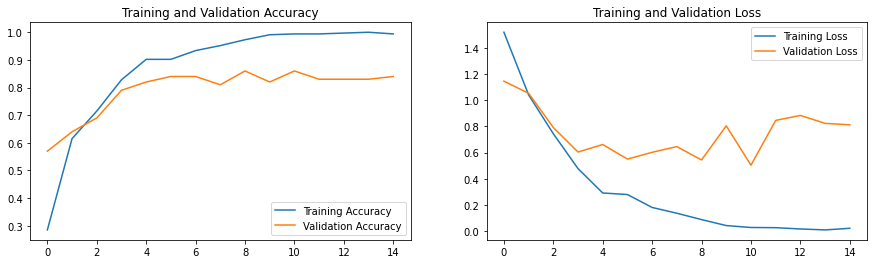

In [18]:
plot(history_conv_3dconv16_3)

In [22]:
#running for higher number of epochs with 0.5 droput value
conv_3dconv16_4=Model3DConv_16()
conv_3dconv16_4.image_size(image_height=150,image_width=150)
conv_3dconv16_4.other_parameters(num_images=30,epochs=15,batch_size=16)
conv_3dconv16_4_model=conv_3dconv16_4.define_model(filter=(3,3,3),dense_neurons=128,dropout=0.5)
conv_3dconv16_4_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_6 (Conv3D)            (None, 28, 148, 148, 16)  1312      
_________________________________________________________________
activation_6 (Activation)    (None, 28, 148, 148, 16)  0         
_________________________________________________________________
max_pooling3d_6 (MaxPooling3 (None, 14, 74, 74, 16)    0         
_________________________________________________________________
conv3d_7 (Conv3D)            (None, 12, 72, 72, 32)    13856     
_________________________________________________________________
activation_7 (Activation)    (None, 12, 72, 72, 32)    0         
_________________________________________________________________
max_pooling3d_7 (MaxPooling3 (None, 6, 36, 36, 32)     0         
_________________________________________________________________
conv3d_8 (Conv3D)            (None, 4, 34, 34, 64)    

In [23]:
print("Total Params:", conv_3dconv16_4_model.count_params())
history_conv_3dconv16_4 = conv_3dconv16_4.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv16_4_model)

Total Params: 4806277
# training sequences = 663
# validation sequences = 100
# epochs = 15
Source path =  datasets/Project_data/train ; batch size = 16
Epoch 1/15
42/42 [==============================] - ETA: 0s - loss: 1.6059 - categorical_accuracy: 0.2459Source path =  datasets/Project_data/val ; batch size = 16

Epoch 00001: saving model to model_init_2021-05-2614_58_04.276872/model-00001-1.60586-0.24585-1.38974-0.32000.h5
42/42 [==============================] - 157s 4s/step - loss: 1.6059 - categorical_accuracy: 0.2459 - val_loss: 1.3897 - val_categorical_accuracy: 0.3200
Epoch 2/15
42/42 [==============================] - ETA: 0s - loss: 1.1977 - categorical_accuracy: 0.5068
Epoch 00002: saving model to model_init_2021-05-2614_58_04.276872/model-00002-1.19773-0.50679-1.03420-0.58000.h5
42/42 [==============================] - 161s 4s/step - loss: 1.1977 - categorical_accuracy: 0.5068 - val_loss: 1.0342 - val_categorical_accuracy: 0.5800
Epoch 3/15
42/42 [========================

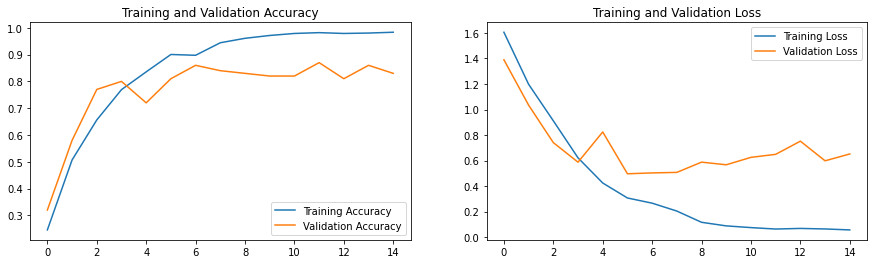

In [24]:
plot(history_conv_3dconv16_4)

In [33]:
#running for right number of epochs with 0.5 droput value
conv_3dconv16_5=Model3DConv_16()
conv_3dconv16_5.image_size(image_height=150,image_width=150)
conv_3dconv16_5.other_parameters(num_images=30,epochs=12,batch_size=16)
conv_3dconv16_5_model=conv_3dconv16_5.define_model(filter=(3,3,3),dense_neurons=128,dropout=0.5)
conv_3dconv16_5_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_18 (Conv3D)           (None, 28, 148, 148, 16)  1312      
_________________________________________________________________
activation_18 (Activation)   (None, 28, 148, 148, 16)  0         
_________________________________________________________________
max_pooling3d_18 (MaxPooling (None, 14, 74, 74, 16)    0         
_________________________________________________________________
conv3d_19 (Conv3D)           (None, 12, 72, 72, 32)    13856     
_________________________________________________________________
activation_19 (Activation)   (None, 12, 72, 72, 32)    0         
_________________________________________________________________
max_pooling3d_19 (MaxPooling (None, 6, 36, 36, 32)     0         
_________________________________________________________________
conv3d_20 (Conv3D)           (None, 4, 34, 34, 64)    

In [34]:
print("Total Params:", conv_3dconv16_5_model.count_params())
history_conv_3dconv16_5 = conv_3dconv16_5.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv16_5_model)

Total Params: 4806277
# training sequences = 663
# validation sequences = 100
# epochs = 12
Source path =  datasets/Project_data/train ; batch size = 16
Epoch 1/12
42/42 [==============================] - ETA: 0s - loss: 1.6522 - categorical_accuracy: 0.2428Source path =  datasets/Project_data/val ; batch size = 16

Epoch 00001: saving model to model_init_2021-05-2616_22_24.119127/model-00001-1.65218-0.24284-1.44988-0.37000.h5
42/42 [==============================] - 158s 4s/step - loss: 1.6522 - categorical_accuracy: 0.2428 - val_loss: 1.4499 - val_categorical_accuracy: 0.3700
Epoch 2/12
42/42 [==============================] - ETA: 0s - loss: 1.2826 - categorical_accuracy: 0.4449
Epoch 00002: saving model to model_init_2021-05-2616_22_24.119127/model-00002-1.28263-0.44495-1.11920-0.58000.h5
42/42 [==============================] - 157s 4s/step - loss: 1.2826 - categorical_accuracy: 0.4449 - val_loss: 1.1192 - val_categorical_accuracy: 0.5800
Epoch 3/12
42/42 [========================

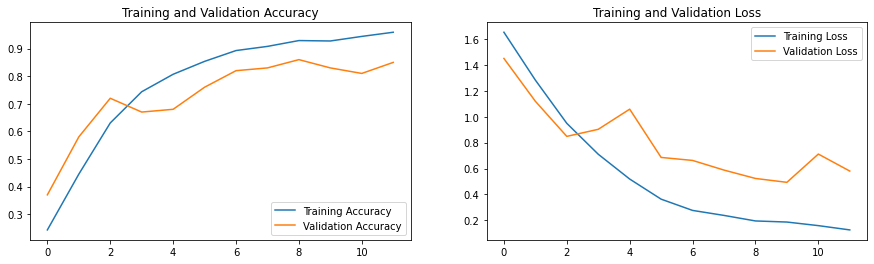

In [35]:
plot(history_conv_3dconv16_5)

In [21]:
#running for less number of images whihc do no give negative dimension error with 0.5 droput value
conv_3dconv16_6=Model3DConv_16()
conv_3dconv16_6.image_size(image_height=150,image_width=150)
conv_3dconv16_6.other_parameters(num_images=22,epochs=12,batch_size=16)
conv_3dconv16_6_model=conv_3dconv16_6.define_model(filter=(3,3,3),dense_neurons=128,dropout=0.5)
conv_3dconv16_6_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_12 (Conv3D)           (None, 20, 148, 148, 16)  1312      
_________________________________________________________________
activation_12 (Activation)   (None, 20, 148, 148, 16)  0         
_________________________________________________________________
max_pooling3d_12 (MaxPooling (None, 10, 74, 74, 16)    0         
_________________________________________________________________
conv3d_13 (Conv3D)           (None, 8, 72, 72, 32)     13856     
_________________________________________________________________
activation_13 (Activation)   (None, 8, 72, 72, 32)     0         
_________________________________________________________________
max_pooling3d_13 (MaxPooling (None, 4, 36, 36, 32)     0         
_________________________________________________________________
conv3d_14 (Conv3D)           (None, 2, 34, 34, 64)    

In [22]:
print("Total Params:", conv_3dconv16_6_model.count_params())
history_conv_3dconv16_6 = conv_3dconv16_6.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv16_6_model)

Total Params: 2438789
# training sequences = 663
# validation sequences = 100
# epochs = 12
Source path =  datasets/Project_data/train ; batch size = 16
Epoch 1/12
42/42 [==============================] - ETA: 0s - loss: 1.6532 - categorical_accuracy: 0.2368Source path =  datasets/Project_data/val ; batch size = 16

Epoch 00001: saving model to model_init_2021-05-2704_58_53.805335/model-00001-1.65322-0.23680-1.37712-0.22000.h5
42/42 [==============================] - 112s 3s/step - loss: 1.6532 - categorical_accuracy: 0.2368 - val_loss: 1.3771 - val_categorical_accuracy: 0.2200
Epoch 2/12
42/42 [==============================] - ETA: 0s - loss: 1.2688 - categorical_accuracy: 0.4646
Epoch 00002: saving model to model_init_2021-05-2704_58_53.805335/model-00002-1.26877-0.46456-0.94333-0.67000.h5
42/42 [==============================] - 116s 3s/step - loss: 1.2688 - categorical_accuracy: 0.4646 - val_loss: 0.9433 - val_categorical_accuracy: 0.6700
Epoch 3/12
42/42 [========================

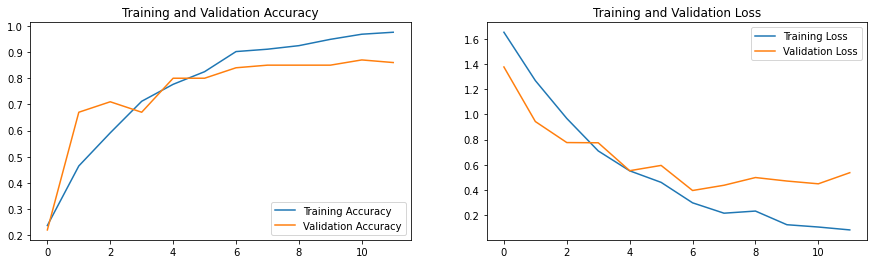

In [23]:
plot(history_conv_3dconv16_6)

In [43]:
#running for less number of images which do not give negative dimension error,higher batch size , with 0.5 droput value
conv_3dconv16_7=Model3DConv_16()
conv_3dconv16_7.image_size(image_height=150,image_width=150)
conv_3dconv16_7.other_parameters(num_images=22,epochs=12,batch_size=39)
conv_3dconv16_7_model=conv_3dconv16_7.define_model(filter=(3,3,3),dense_neurons=128,dropout=0.5)
conv_3dconv16_7_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_18 (Conv3D)           (None, 20, 148, 148, 16)  1312      
_________________________________________________________________
activation_18 (Activation)   (None, 20, 148, 148, 16)  0         
_________________________________________________________________
max_pooling3d_18 (MaxPooling (None, 10, 74, 74, 16)    0         
_________________________________________________________________
conv3d_19 (Conv3D)           (None, 8, 72, 72, 32)     13856     
_________________________________________________________________
activation_19 (Activation)   (None, 8, 72, 72, 32)     0         
_________________________________________________________________
max_pooling3d_19 (MaxPooling (None, 4, 36, 36, 32)     0         
_________________________________________________________________
conv3d_20 (Conv3D)           (None, 2, 34, 34, 64)    

In [44]:
print("Total Params:", conv_3dconv16_7_model.count_params())
history_conv_3dconv16_7 = conv_3dconv16_7.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv16_7_model)

Total Params: 2438789
# training sequences = 663
# validation sequences = 100
# epochs = 12
Source path =  datasets/Project_data/train ; batch size = 39
Epoch 1/12
17/17 [==============================] - ETA: 0s - loss: 1.6400 - categorical_accuracy: 0.2262Source path =  datasets/Project_data/val ; batch size = 39

Epoch 00001: saving model to model_init_2021-05-2705_50_27.691344/model-00001-1.64004-0.22624-1.54503-0.26000.h5
17/17 [==============================] - 119s 7s/step - loss: 1.6400 - categorical_accuracy: 0.2262 - val_loss: 1.5450 - val_categorical_accuracy: 0.2600
Epoch 2/12
17/17 [==============================] - ETA: 0s - loss: 1.4706 - categorical_accuracy: 0.2866
Epoch 00002: saving model to model_init_2021-05-2705_50_27.691344/model-00002-1.47059-0.28658-1.25695-0.42000.h5
17/17 [==============================] - 120s 7s/step - loss: 1.4706 - categorical_accuracy: 0.2866 - val_loss: 1.2569 - val_categorical_accuracy: 0.4200
Epoch 3/12
17/17 [========================

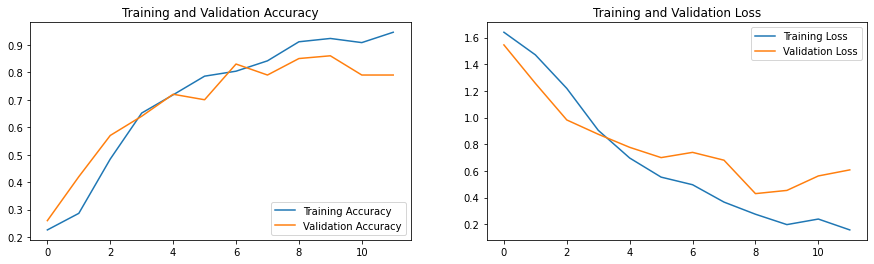

In [45]:
plot(history_conv_3dconv16_7)

In [46]:
#running for smaller image size and batch size(as higher batch size didn't prove good) , with 0.5 droput value
conv_3dconv16_8=Model3DConv_16()
conv_3dconv16_8.image_size(image_height=120,image_width=120)
conv_3dconv16_8.other_parameters(num_images=22,epochs=12,batch_size=20)
conv_3dconv16_8_model=conv_3dconv16_8.define_model(filter=(3,3,3),dense_neurons=128,dropout=0.5)
conv_3dconv16_8_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_21 (Conv3D)           (None, 20, 118, 118, 16)  1312      
_________________________________________________________________
activation_21 (Activation)   (None, 20, 118, 118, 16)  0         
_________________________________________________________________
max_pooling3d_21 (MaxPooling (None, 10, 59, 59, 16)    0         
_________________________________________________________________
conv3d_22 (Conv3D)           (None, 8, 57, 57, 32)     13856     
_________________________________________________________________
activation_22 (Activation)   (None, 8, 57, 57, 32)     0         
_________________________________________________________________
max_pooling3d_22 (MaxPooling (None, 4, 28, 28, 32)     0         
_________________________________________________________________
conv3d_23 (Conv3D)           (None, 2, 26, 26, 64)    

In [47]:
print("Total Params:", conv_3dconv16_8_model.count_params())
history_conv_3dconv16_8 = conv_3dconv16_8.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv16_8_model)

Total Params: 1455749
# training sequences = 663
# validation sequences = 100
# epochs = 12
Source path =  datasets/Project_data/train ; batch size = 20
Epoch 1/12
34/34 [==============================] - ETA: 0s - loss: 1.5830 - categorical_accuracy: 0.2383Source path =  datasets/Project_data/val ; batch size = 20

Epoch 00001: saving model to model_init_2021-05-2706_16_29.012615/model-00001-1.58301-0.23831-1.37584-0.40000.h5
34/34 [==============================] - 110s 3s/step - loss: 1.5830 - categorical_accuracy: 0.2383 - val_loss: 1.3758 - val_categorical_accuracy: 0.4000
Epoch 2/12
34/34 [==============================] - ETA: 0s - loss: 1.3293 - categorical_accuracy: 0.4118
Epoch 00002: saving model to model_init_2021-05-2706_16_29.012615/model-00002-1.32928-0.41176-1.05422-0.55000.h5
34/34 [==============================] - 109s 3s/step - loss: 1.3293 - categorical_accuracy: 0.4118 - val_loss: 1.0542 - val_categorical_accuracy: 0.5500
Epoch 3/12
34/34 [========================

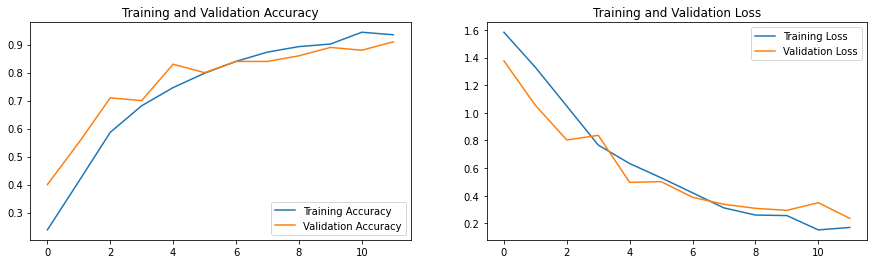

In [48]:
plot(history_conv_3dconv16_8)

## Final Model- Best performing Model parameters for Model 16

In [50]:
#running for the model above with higher epochs for even better accuracy 
conv_3dconv16_9=Model3DConv_16()
conv_3dconv16_9.image_size(image_height=120,image_width=120)
conv_3dconv16_9.other_parameters(num_images=22,epochs=15,batch_size=20)
conv_3dconv16_9_model=conv_3dconv16_9.define_model(filter=(3,3,3),dense_neurons=128,dropout=0.5)
conv_3dconv16_9_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_24 (Conv3D)           (None, 20, 118, 118, 16)  1312      
_________________________________________________________________
activation_24 (Activation)   (None, 20, 118, 118, 16)  0         
_________________________________________________________________
max_pooling3d_24 (MaxPooling (None, 10, 59, 59, 16)    0         
_________________________________________________________________
conv3d_25 (Conv3D)           (None, 8, 57, 57, 32)     13856     
_________________________________________________________________
activation_25 (Activation)   (None, 8, 57, 57, 32)     0         
_________________________________________________________________
max_pooling3d_25 (MaxPooling (None, 4, 28, 28, 32)     0         
_________________________________________________________________
conv3d_26 (Conv3D)           (None, 2, 26, 26, 64)    

In [51]:
print("Total Params:", conv_3dconv16_9_model.count_params())
history_conv_3dconv16_9 = conv_3dconv16_9.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv16_9_model)

Total Params: 1455749
# training sequences = 663
# validation sequences = 100
# epochs = 15
Source path =  datasets/Project_data/train ; batch size = 20
Epoch 1/15
34/34 [==============================] - ETA: 0s - loss: 1.5439 - categorical_accuracy: 0.2579Source path =  datasets/Project_data/val ; batch size = 20

Epoch 00001: saving model to model_init_2021-05-2706_40_29.361007/model-00001-1.54388-0.25792-1.32312-0.31000.h5
34/34 [==============================] - 109s 3s/step - loss: 1.5439 - categorical_accuracy: 0.2579 - val_loss: 1.3231 - val_categorical_accuracy: 0.3100
Epoch 2/15
34/34 [==============================] - ETA: 0s - loss: 1.1911 - categorical_accuracy: 0.5053
Epoch 00002: saving model to model_init_2021-05-2706_40_29.361007/model-00002-1.19109-0.50528-0.88626-0.62000.h5
34/34 [==============================] - 108s 3s/step - loss: 1.1911 - categorical_accuracy: 0.5053 - val_loss: 0.8863 - val_categorical_accuracy: 0.6200
Epoch 3/15
34/34 [========================

**Thus ,the conv_3dconv16_9 is the best model until now considering it has achieved a good and the highest validation and train accuracy with  around 1.5 million parameters only.** 

**The number of parameters is less than the previous model iterations.**

**The val and train loss are decreasing and the accuracy is increasing.**

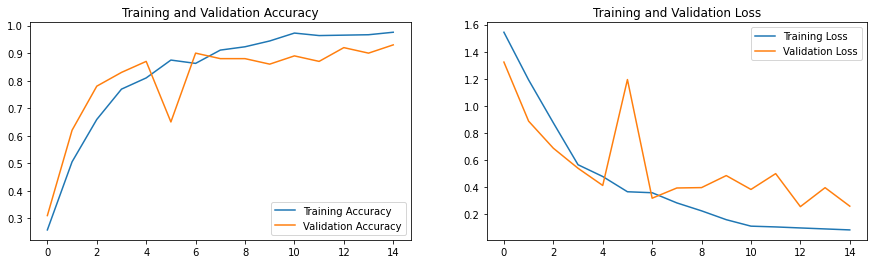

In [52]:
plot(history_conv_3dconv16_9)

## Let's try to see if the accuracy could be improved further 

In [53]:
#Modifying the optimiser to see if it brings any change
class Model3DConv_17(ModelGenerator):

    def define_model(self,filter=(3,3,3),dense_neurons=64,dropout=0.25):

        input_shape_model = (self.num_images,self.image_width,self.image_height,3)
        
        model = Sequential()
        
        model.add(Conv3D(16, filter,input_shape=input_shape_model))
        model.add(Activation('relu'))
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        
        model.add(Conv3D(32, filter))
        model.add(Activation('relu'))
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        
        
        model.add(Conv3D(64, filter))
        model.add(Activation('relu'))
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        
        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(Dropout(dropout))

        model.add(Dense(5,activation='softmax'))

        optimiser = 'rmsprop'
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        #K.set_value(model.optimizer.learning_rate,0.0002)

        return model

In [54]:
#running the best parameters for rmsprop model 17
conv_3dconv17_1=Model3DConv_17()
conv_3dconv17_1.image_size(image_height=120,image_width=120)
conv_3dconv17_1.other_parameters(num_images=22,epochs=15,batch_size=20)
conv_3dconv17_1_model=conv_3dconv17_1.define_model(filter=(3,3,3),dense_neurons=128,dropout=0.5)
conv_3dconv17_1_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_27 (Conv3D)           (None, 20, 118, 118, 16)  1312      
_________________________________________________________________
activation_27 (Activation)   (None, 20, 118, 118, 16)  0         
_________________________________________________________________
max_pooling3d_27 (MaxPooling (None, 10, 59, 59, 16)    0         
_________________________________________________________________
conv3d_28 (Conv3D)           (None, 8, 57, 57, 32)     13856     
_________________________________________________________________
activation_28 (Activation)   (None, 8, 57, 57, 32)     0         
_________________________________________________________________
max_pooling3d_28 (MaxPooling (None, 4, 28, 28, 32)     0         
_________________________________________________________________
conv3d_29 (Conv3D)           (None, 2, 26, 26, 64)    

In [55]:
print("Total Params:", conv_3dconv17_1_model.count_params())
history_conv_3dconv17_1 = conv_3dconv17_1.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv17_1_model)

Total Params: 1455749
# training sequences = 663
# validation sequences = 100
# epochs = 15
Source path =  datasets/Project_data/train ; batch size = 20
Epoch 1/15
34/34 [==============================] - ETA: 0s - loss: 1.7768 - categorical_accuracy: 0.2579Source path =  datasets/Project_data/val ; batch size = 20

Epoch 00001: saving model to model_init_2021-05-2707_14_50.406188/model-00001-1.77679-0.25792-1.52522-0.41000.h5
34/34 [==============================] - 109s 3s/step - loss: 1.7768 - categorical_accuracy: 0.2579 - val_loss: 1.5252 - val_categorical_accuracy: 0.4100
Epoch 2/15
34/34 [==============================] - ETA: 0s - loss: 1.3847 - categorical_accuracy: 0.4027
Epoch 00002: saving model to model_init_2021-05-2707_14_50.406188/model-00002-1.38472-0.40271-1.37739-0.42000.h5
34/34 [==============================] - 111s 3s/step - loss: 1.3847 - categorical_accuracy: 0.4027 - val_loss: 1.3774 - val_categorical_accuracy: 0.4200
Epoch 3/15
34/34 [========================

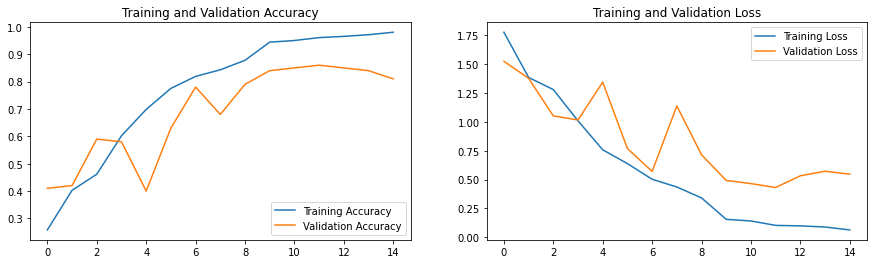

In [56]:
plot(history_conv_3dconv17_1)

*Hence adam was better but now let's try to change activation function and see the output with adam optimiser for the best model*

In [57]:
#Modifying the optimiser back to adam and change the activation function to elu
class Model3DConv_18(ModelGenerator):

    def define_model(self,filter=(3,3,3),dense_neurons=64,dropout=0.25):

        input_shape_model = (self.num_images,self.image_width,self.image_height,3)
        
        model = Sequential()
        
        model.add(Conv3D(16, filter,input_shape=input_shape_model))
        model.add(Activation('elu'))
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        
        model.add(Conv3D(32, filter))
        model.add(Activation('elu'))
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        
        
        model.add(Conv3D(64, filter))
        model.add(Activation('elu'))
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        
        model.add(Flatten())
        model.add(Dense(dense_neurons,activation='elu'))
        model.add(Dropout(dropout))

        model.add(Dense(5,activation='softmax'))

        optimiser = 'adam'
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        #K.set_value(model.optimizer.learning_rate,0.0002)

        return model

In [58]:
#running the best parameters of model 17 for elu
conv_3dconv18_1=Model3DConv_18()
conv_3dconv18_1.image_size(image_height=120,image_width=120)
conv_3dconv18_1.other_parameters(num_images=22,epochs=15,batch_size=20)
conv_3dconv18_1_model=conv_3dconv18_1.define_model(filter=(3,3,3),dense_neurons=128,dropout=0.5)
conv_3dconv18_1_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_30 (Conv3D)           (None, 20, 118, 118, 16)  1312      
_________________________________________________________________
activation_30 (Activation)   (None, 20, 118, 118, 16)  0         
_________________________________________________________________
max_pooling3d_30 (MaxPooling (None, 10, 59, 59, 16)    0         
_________________________________________________________________
conv3d_31 (Conv3D)           (None, 8, 57, 57, 32)     13856     
_________________________________________________________________
activation_31 (Activation)   (None, 8, 57, 57, 32)     0         
_________________________________________________________________
max_pooling3d_31 (MaxPooling (None, 4, 28, 28, 32)     0         
_________________________________________________________________
conv3d_32 (Conv3D)           (None, 2, 26, 26, 64)   

In [59]:
print("Total Params:", conv_3dconv18_1_model.count_params())
history_conv_3dconv18_1 = conv_3dconv18_1.train_model(train_path,val_path,train_doc,val_doc,conv_3dconv18_1_model)

Total Params: 1455749
# training sequences = 663
# validation sequences = 100
# epochs = 15
Source path =  datasets/Project_data/train ; batch size = 20
Epoch 1/15
34/34 [==============================] - ETA: 0s - loss: 1.5878 - categorical_accuracy: 0.4299Source path =  datasets/Project_data/val ; batch size = 20

Epoch 00001: saving model to model_init_2021-05-2707_47_34.514646/model-00001-1.58779-0.42986-1.05993-0.59000.h5
34/34 [==============================] - 108s 3s/step - loss: 1.5878 - categorical_accuracy: 0.4299 - val_loss: 1.0599 - val_categorical_accuracy: 0.5900
Epoch 2/15
34/34 [==============================] - ETA: 0s - loss: 0.7153 - categorical_accuracy: 0.7511
Epoch 00002: saving model to model_init_2021-05-2707_47_34.514646/model-00002-0.71528-0.75113-0.74468-0.74000.h5
34/34 [==============================] - 108s 3s/step - loss: 0.7153 - categorical_accuracy: 0.7511 - val_loss: 0.7447 - val_categorical_accuracy: 0.7400
Epoch 3/15
34/34 [========================

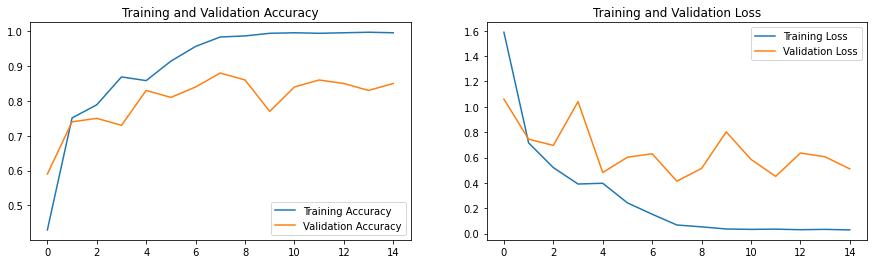

In [60]:
plot(history_conv_3dconv18_1)

## CONCLUSION

As there was no further improvement in the val/train model accuracy and no decrease in the val/train loss after conv_3dconv16_9 hence considering it the best and final model with below parameters:
* Model Architecture - Model3DConv_16
* Model Name- conv_3dconv16_9
* Trainable parameters(~1.5M)- 1,455,749 *
* Epochs- 15, Image size - 120*120, Number of images per video – 22, Batch Size- 20, Filter Size – (3,3,3) *
* Training accuracy- 98% ; Validation-accuracy- 93% *
